# How to run a simulation with space charge?
# REDPIC vs KENV

[Vyacheslav Fedorov](http://fuodorov.github.io)

## Introduction

In [1]:
import redpic as rp
import kenv as kv
import holoviews as hv
import numpy as np 
import pandas as pd
import glob

hv.notebook_extension('matplotlib')

%output size=150 backend='matplotlib' fig='png' dpi=200

%opts Curve [show_grid=True aspect=5] (linewidth=1 alpha=0.7 color='blue')
%opts Scatter [show_grid=True aspect=5] (alpha=0.7 s=0.5)

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

## Beam

In [2]:
kenbeam = kv.Beam(energy=2, current=2e3, radius=55e-3, rp=0.0, normalized_emittance=1000e-6)

In [3]:
redbeam = rp.Beam(rp.electron, charge=-2.0e-05) # ON space charge

In [4]:
KV = rp.Distribution(name='KV', x=0.055, y=0.055, z=3, px=0.0, py=0.0, pz=2.4585) # KV distribution

In [5]:
redbeam.generate(KV, n=1e4)

## Accelereator

In [6]:
acc = kv.Accelerator(0.7, 7.7, 0.01)

In [7]:
Ez_beamline = {}
for   z0,          E0,       filename,      name in [
    # m            MV/m                     Unique name
    [ 4.223,      -1.2,     'Ez.dat',  'Acc. 1'],
    [ 6.076,      -1.2,     'Ez.dat',  'Acc. 2'],   
]:
    acc.Ez_beamline[name] = kv.Element(z0, E0, filename, name)

In [8]:
Bz_beamline = {}
for   z0,         B0,        filename,       name in [
    # m           T                          Unique name
    [ 0.950,     0.035,    'Bz.dat', 'Sol. 1'],
    [ 2.100,     0.032,    'Bz.dat', 'Sol. 2'],
    [ 2.900,     0.043,    'Bz.dat', 'Sol. 3'],
    [ 3.800,     0.038,    'Bz.dat', 'Sol. 4'],
    [ 4.700,     0.047,    'Bz.dat', 'Sol. 5'],
    [ 5.600,     0.052,    'Bz.dat', 'Sol. 6'],
    [ 6.500,     0.050,    'Bz.dat', 'Sol. 7'],
 ]:
    acc.Bz_beamline[name] = kv.Element(z0, B0, filename, name)

In [9]:
acc.compile()

## Simulation

In [10]:
kensim = kv.Simulation(kenbeam, acc)

In [11]:
redsim = rp.Simulation(redbeam, acc)

In [12]:
kensim.track()

In [13]:
redsim.track()

z = 10.68 m (99.8 %) 

## Plot

In [13]:
track_files = np.sort(glob.glob('*.*[0-9].csv'))
cols = ['x', 'y', 'z', 'px', 'py', 'pz', 'Ex', 'Ey', 'Ez', 'Bx', 'By', 'Bz']
i_to_plot = np.arange(0, len(track_files), 1)

In [14]:
def read_track(fname):
    df = pd.read_csv(fname, dtype='float32')
    df['x'] = df['x']*1e3 # mm
    df['y'] = df['y']*1e3 # mm
    df['Bx'] = df['Bx']*1e4 # Gs
    df['By'] = df['By']*1e4 # Gs
    df['Bz'] = df['Bz']*1e4 # Gs
    #df = df.sample(n=100000) # if particles number > 100_000  
    return df

In [15]:
dim_x = hv.Dimension('x', unit='mm', range=(-100, 100))
dim_y = hv.Dimension('y', unit='mm')
dim_z = hv.Dimension('z', unit='m', range=(acc.z_start, acc.z_stop))
dim_px = hv.Dimension('px', unit='MeV/c', label='$p_x$')
dim_py = hv.Dimension('py', unit='MeV/c', label='$p_y$')
dim_pz = hv.Dimension('pz', unit='MeV/c', label='$p_z$')
dim_Ex = hv.Dimension('Ex', unit='MV/m', label='$E_x$')
dim_Ey = hv.Dimension('Ey', unit='MV/m', label='$E_y$')
dim_Ez = hv.Dimension('Ez', unit='MV/m', label='$E_z$')
dim_Bx = hv.Dimension('Bx', unit='Gs', label='$B_x$')
dim_By = hv.Dimension('By', unit='Gs', label='$B_y$')
dim_Bz = hv.Dimension('Bz', unit='Gs', label='$B_z$')

In [18]:
def plot(i):
    fname = track_files[i]
    df = read_track(fname)
    ken_z_x = hv.Curve(((acc.z,kensim.envelope_x(acc.z)*1e3)), kdims=[dim_z], vdims=[dim_x], label='kenv')*\
    hv.Curve(((acc.parameter,-kensim.envelope_x(acc.z)*1e3)), kdims=[dim_z], vdims=[dim_x])
    red_z_x   = hv.Scatter(df, kdims=[dim_z, dim_x], label='redpic')
    red_z_y   = hv.Scatter(df, kdims=[dim_z, dim_y], label='redpic')
    red_z_px  = hv.Scatter(df, kdims=[dim_z, dim_px], label='redpic')
    red_z_pz  = hv.Scatter(df, kdims=[dim_z, dim_pz], label='redpic')
    red_z_Ez  = hv.Scatter(df, kdims=[dim_z, dim_Ez], label='redpic')
    red_z_Bz = hv.Scatter(df, kdims=[dim_z, dim_Bz], label='redpic')
    ken_z_Bz = hv.Curve(((acc.z, acc.Bz(acc.z)*1e4)), kdims=[dim_z], vdims=[dim_Bz], label='kenv')
    ken_z_Ez = hv.Curve(((acc.z, acc.Ez(acc.z))), kdims=[dim_z], vdims=[dim_Ez], label='kenv')
    red_x_y   = hv.Scatter(df, kdims=[dim_x, dim_y], label='redpic')
    red_x_px = hv.Scatter(df, kdims=[dim_x, dim_px], label='redpic')
    return (red_z_x*ken_z_x + red_z_Bz*ken_z_Bz + red_z_Ez*ken_z_Ez).cols(1)

:Layout
   .Overlay.I   :HoloMap   [Track file index]
      :Overlay
         .Scatter.Redpic :Scatter   [z,x]   (Unnamed: 0,y,px,py,pz,Bx,By,Bz,Ex,Ey,Ez)
         .Curve.Kenv     :Curve   [z]   (x)
         .Curve.I        :Curve   [z]   (x)
   .Overlay.II  :HoloMap   [Track file index]
      :Overlay
         .Scatter.Redpic :Scatter   [z,Bz]   (Unnamed: 0,x,y,px,py,pz,Bx,By,Ex,Ey,Ez)
         .Curve.Kenv     :Curve   [z]   (Bz)
   .Overlay.III :HoloMap   [Track file index]
      :Overlay
         .Scatter.Redpic :Scatter   [z,Ez]   (Unnamed: 0,x,y,px,py,pz,Bx,By,Bz,Ex,Ey)
         .Curve.Kenv     :Curve   [z]   (Ez)
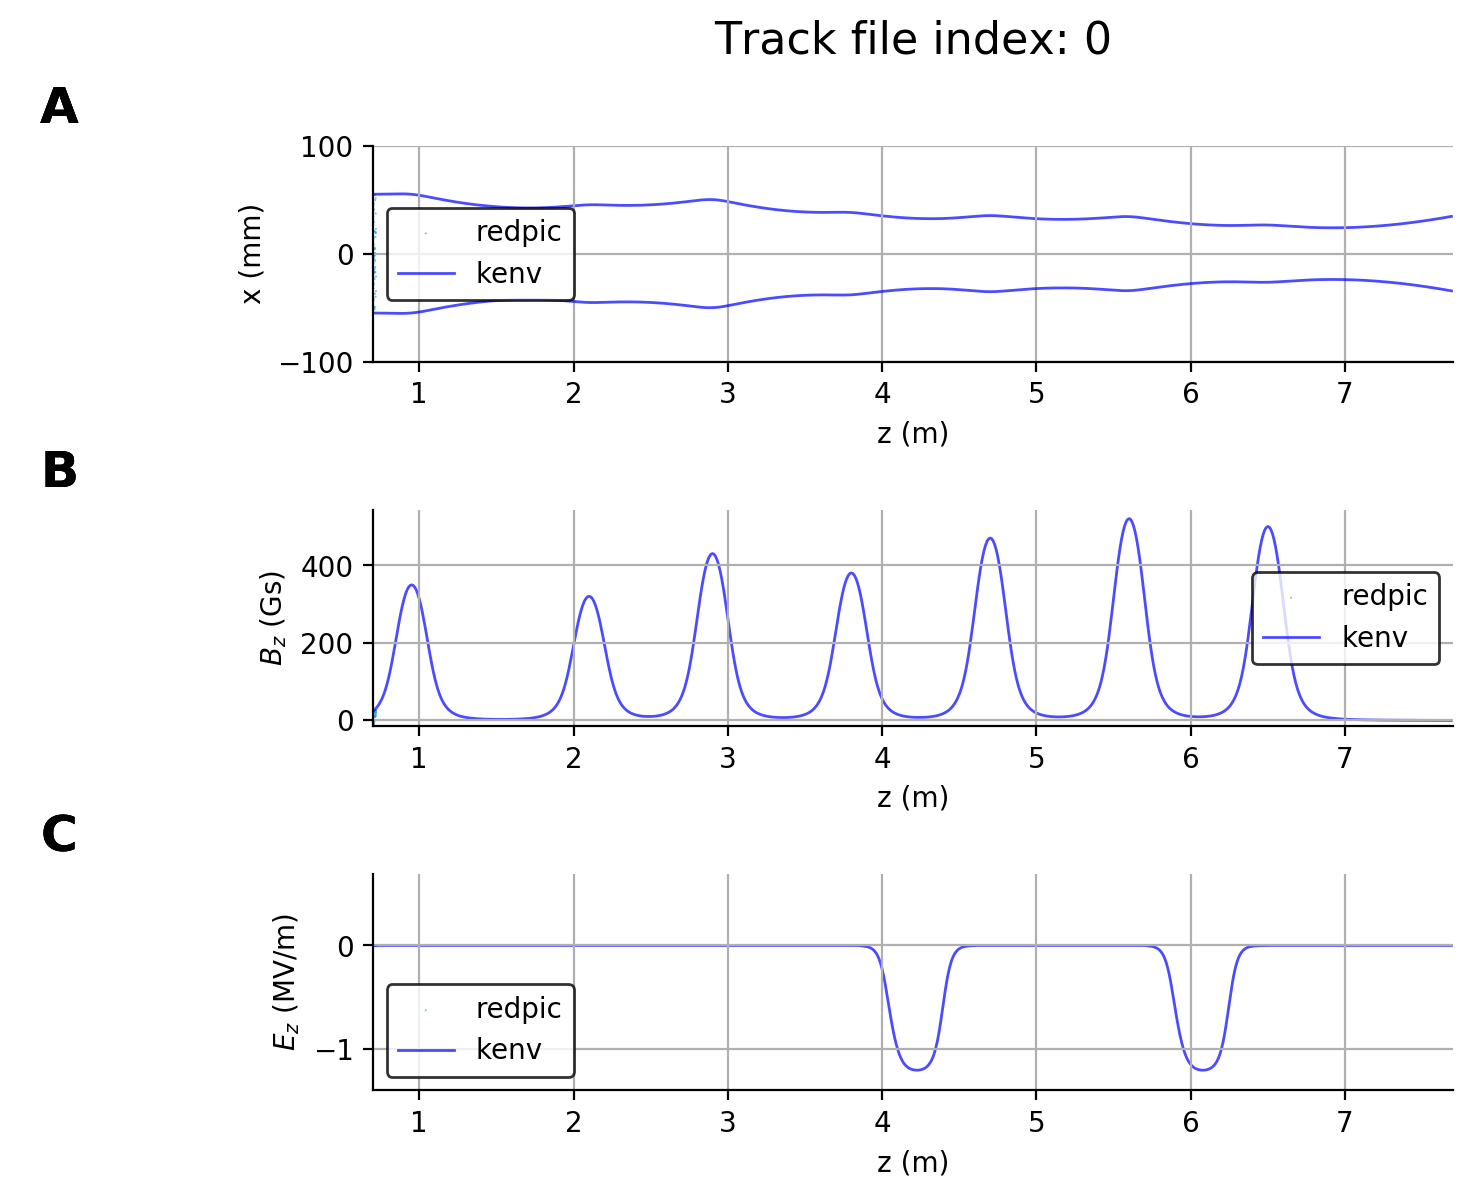
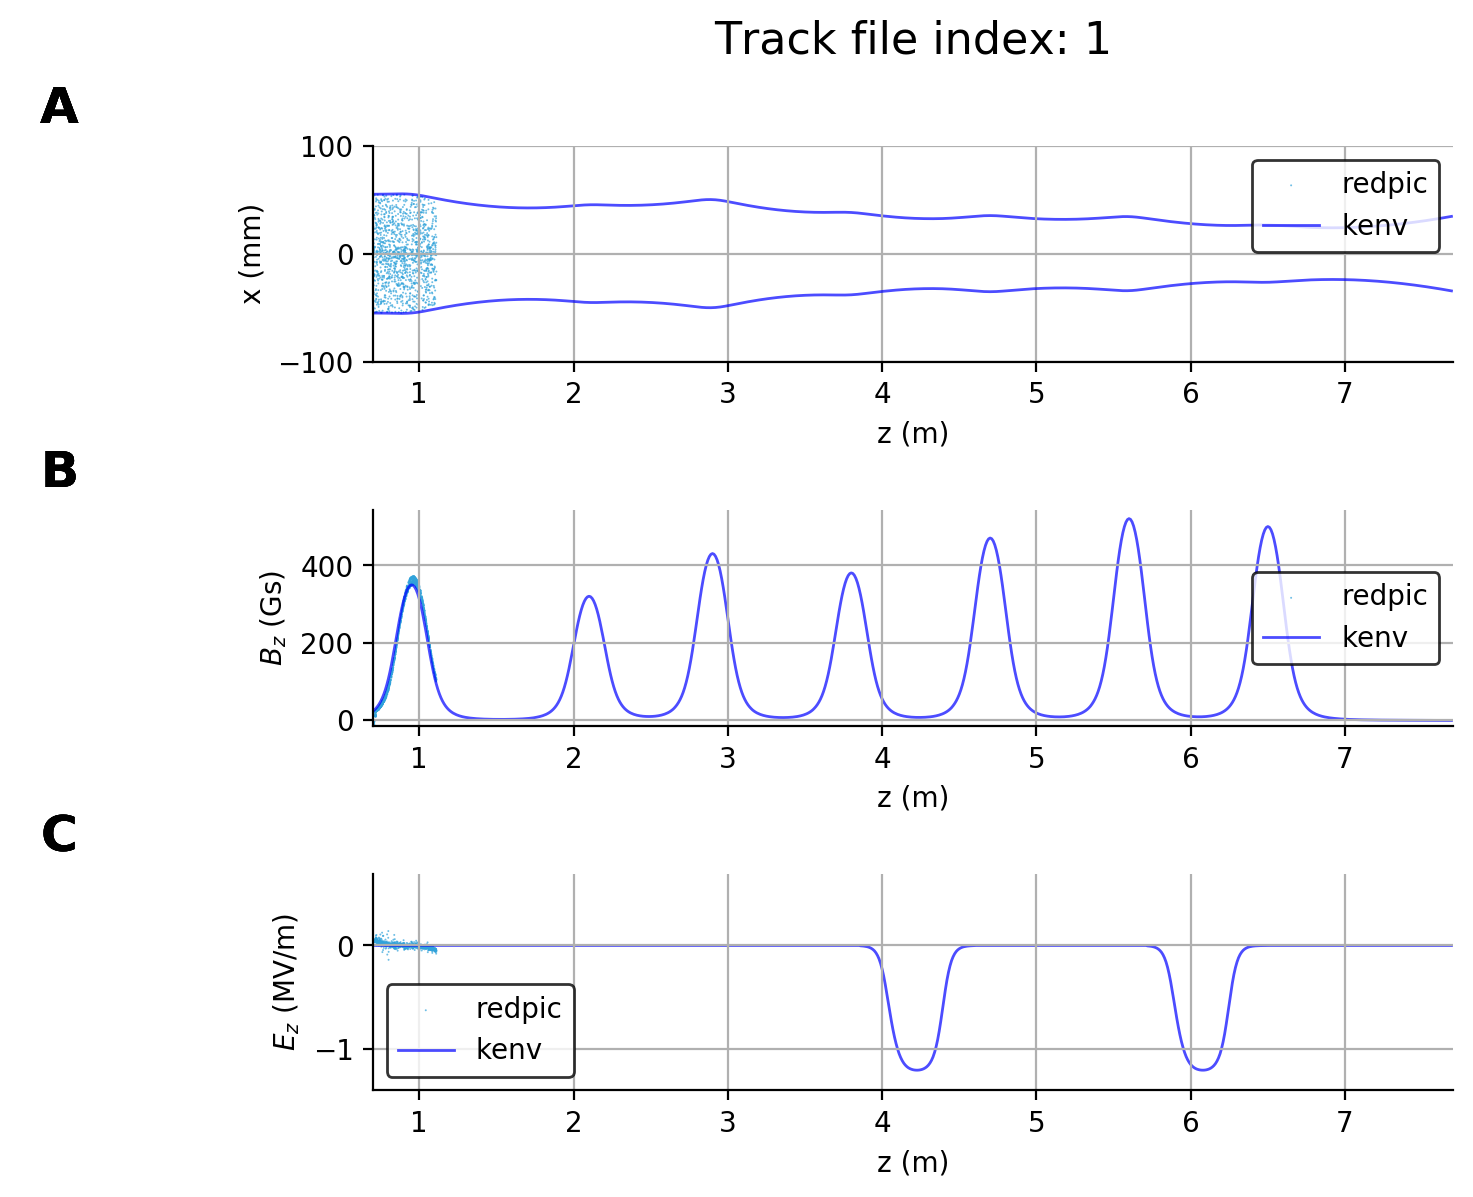
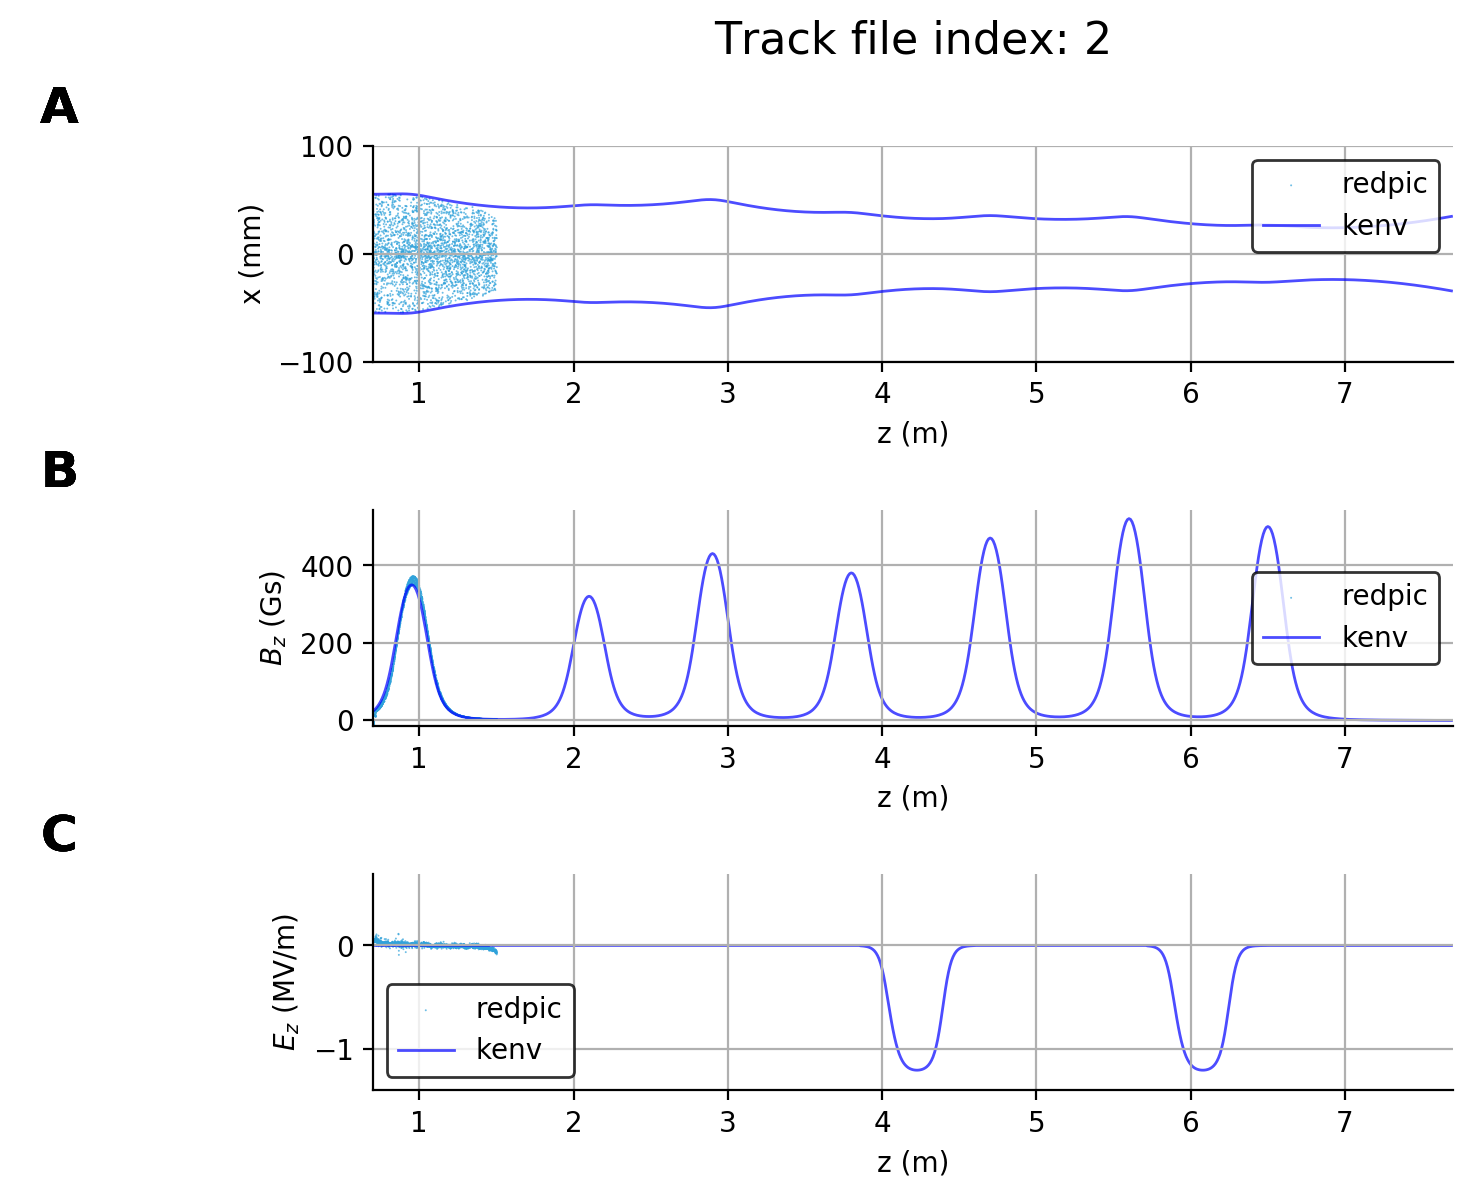
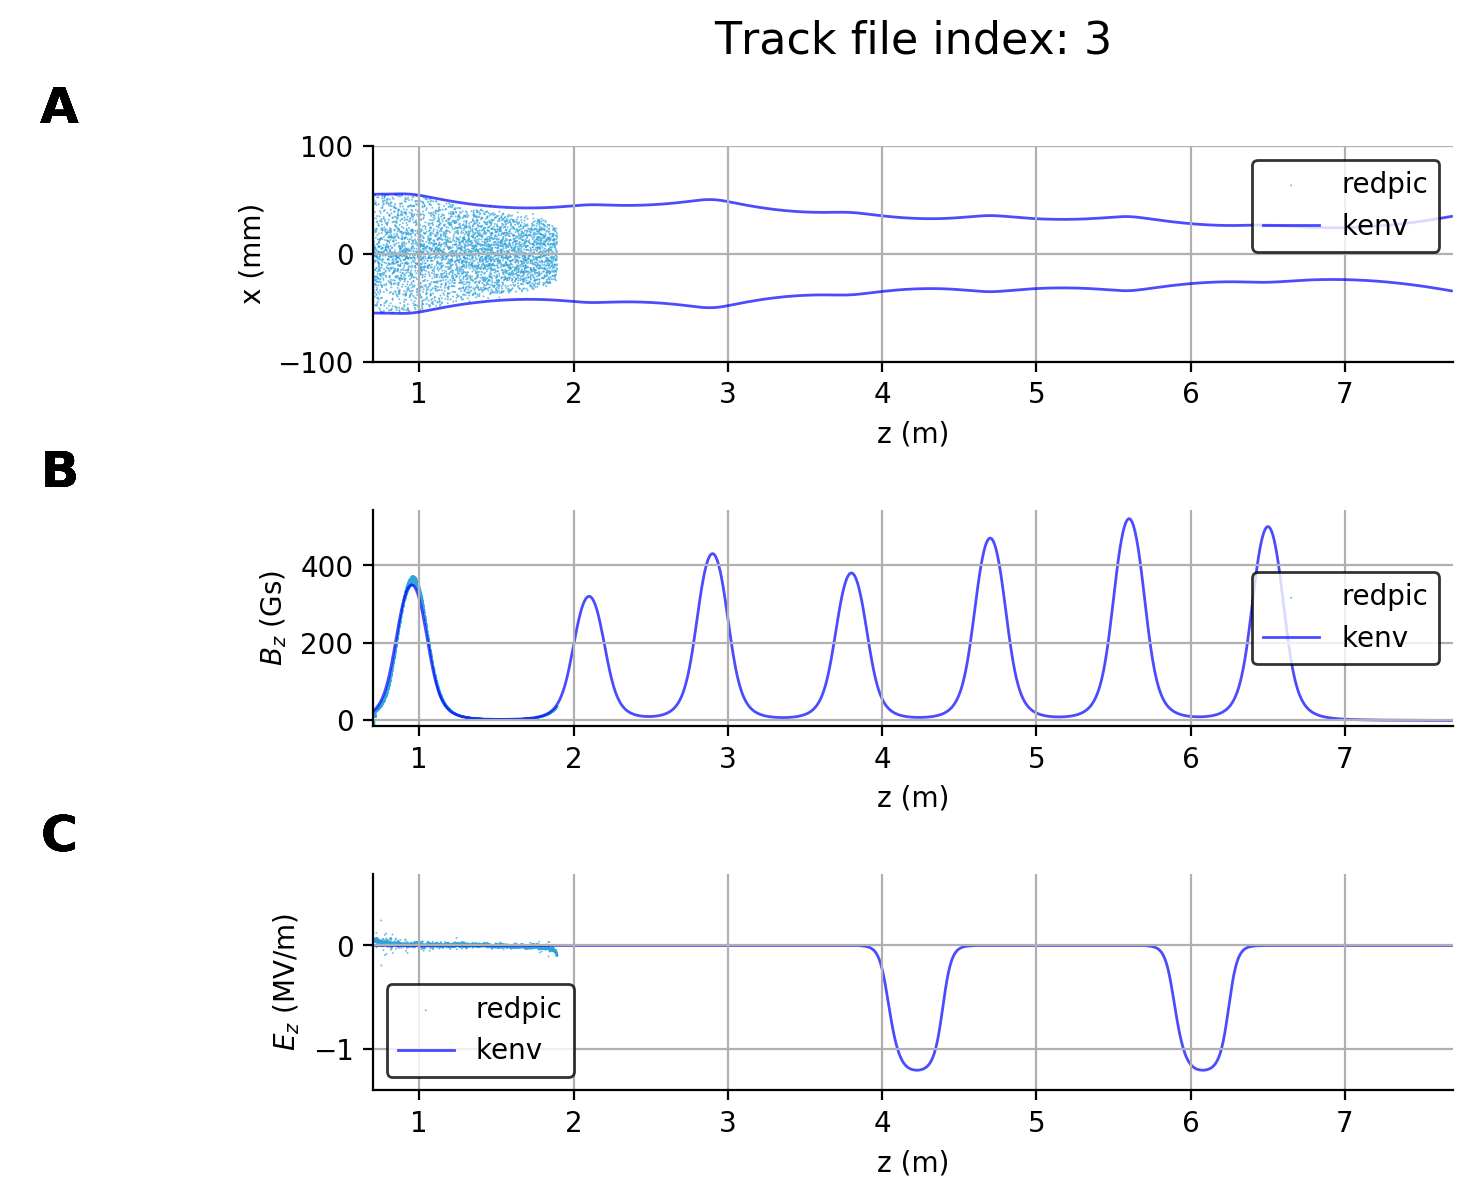
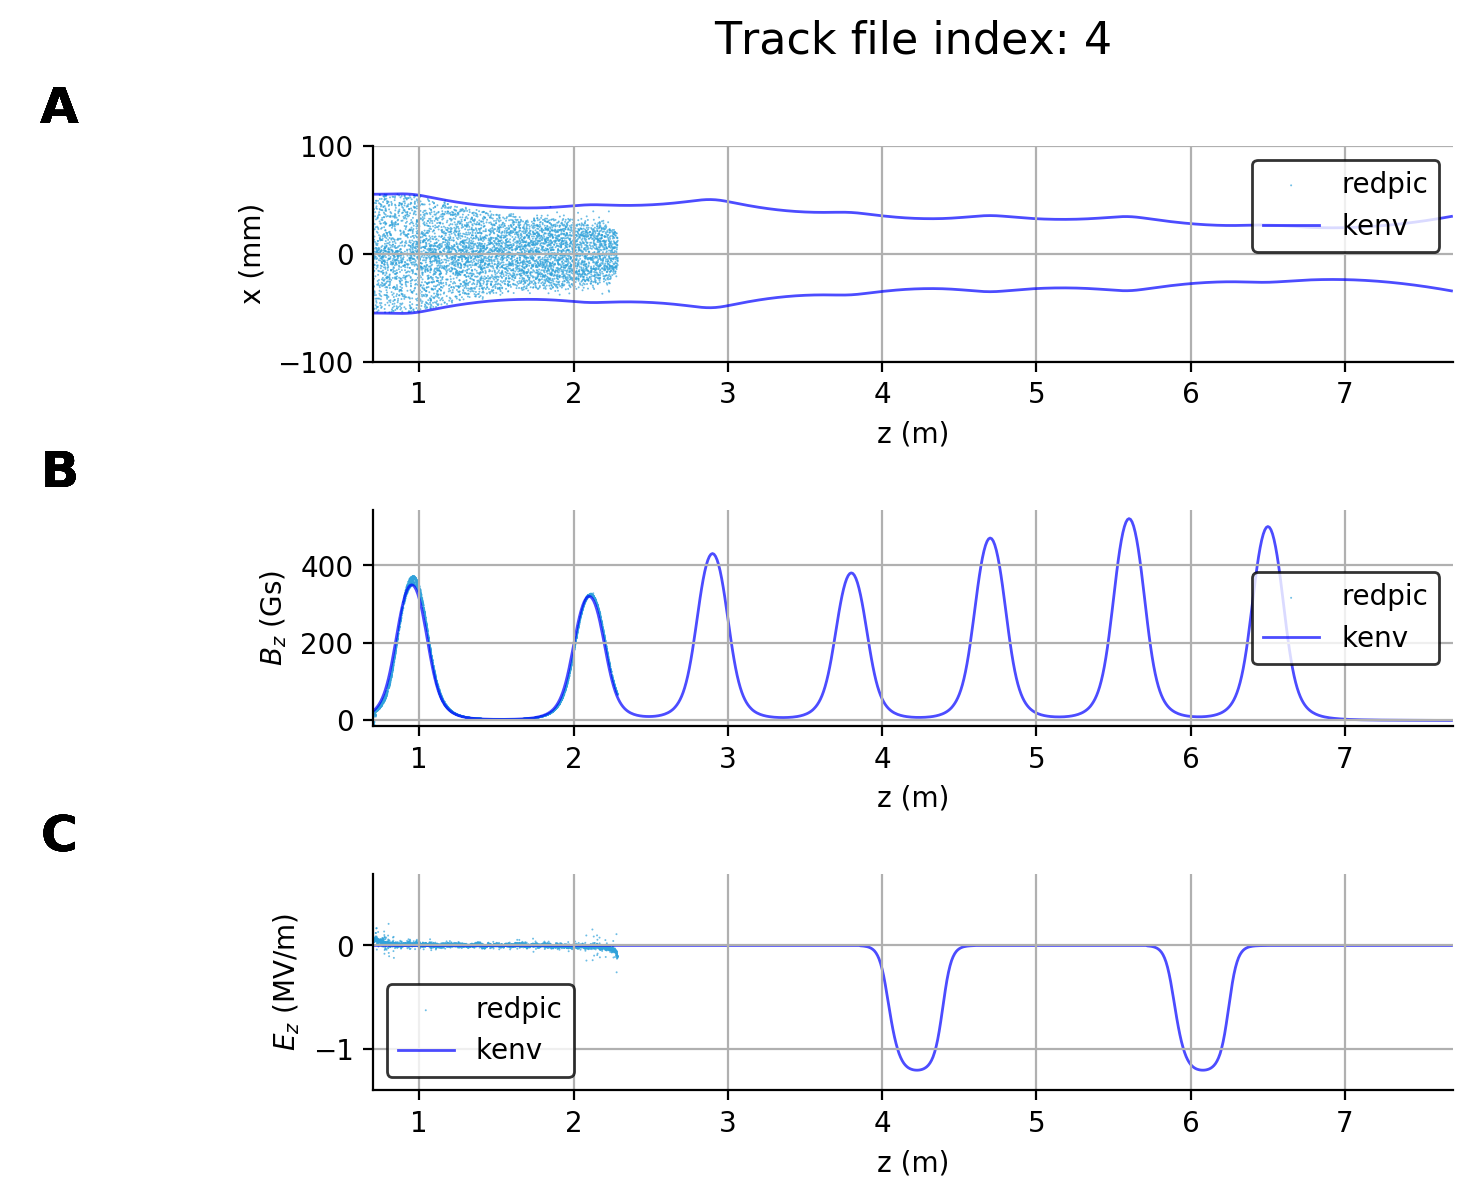
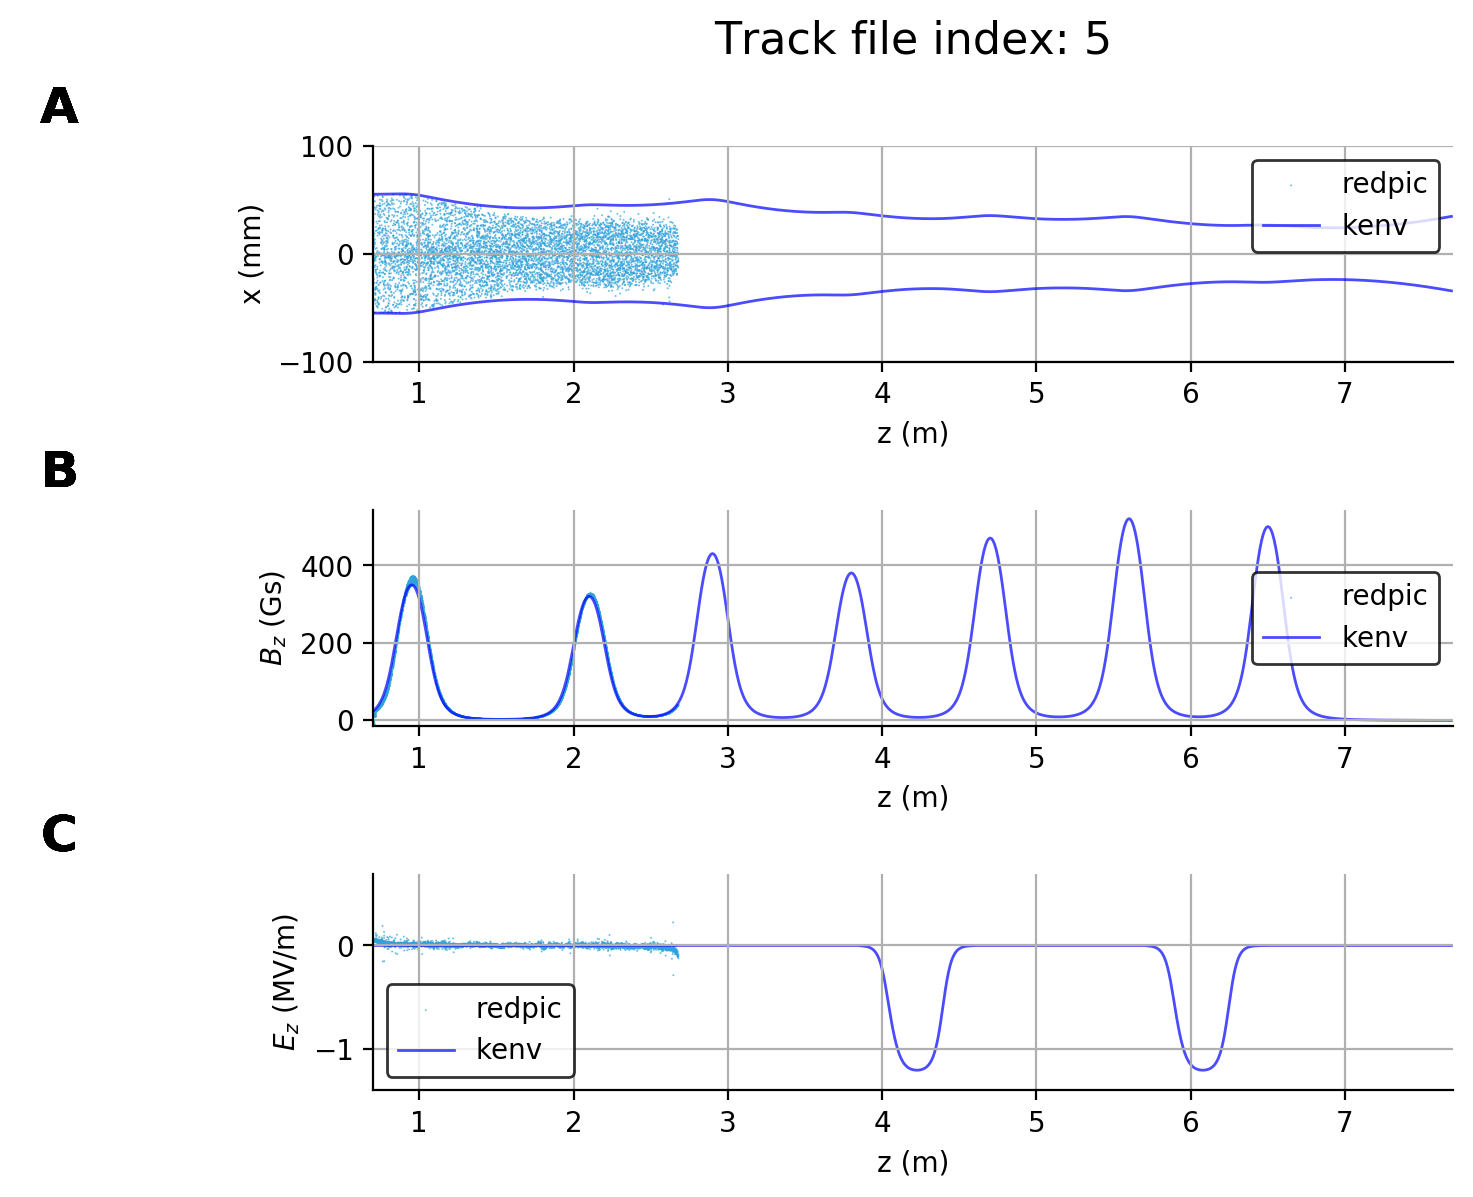
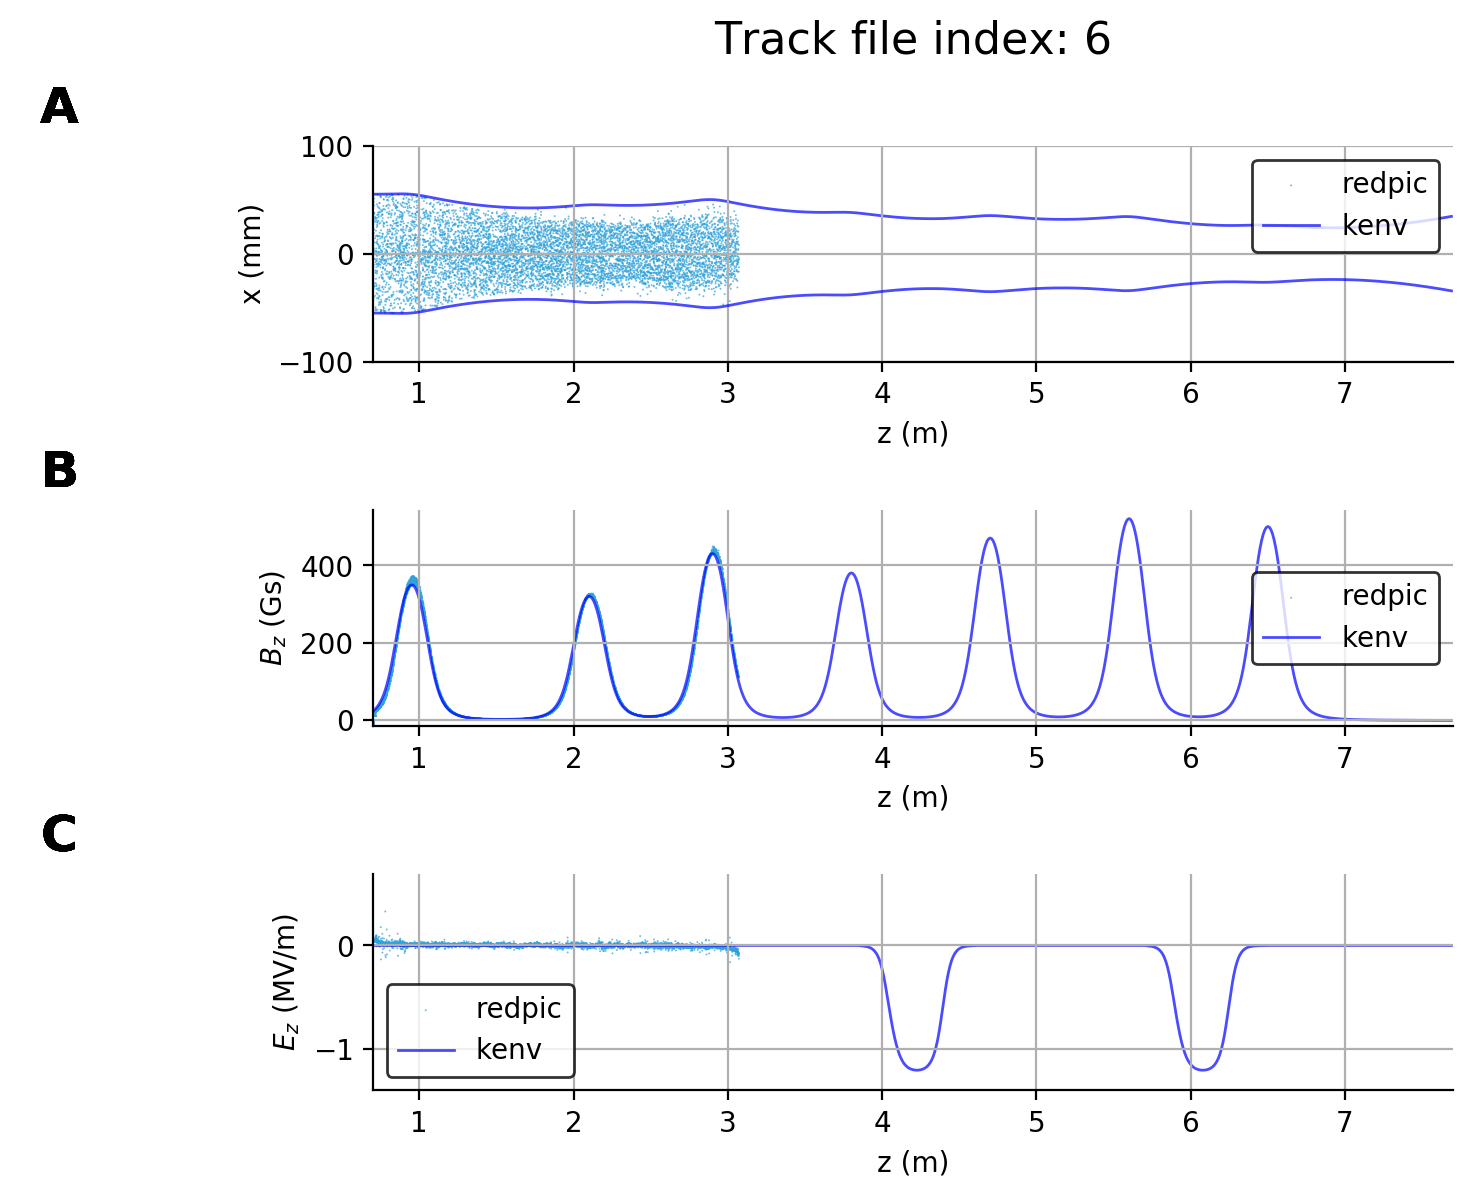
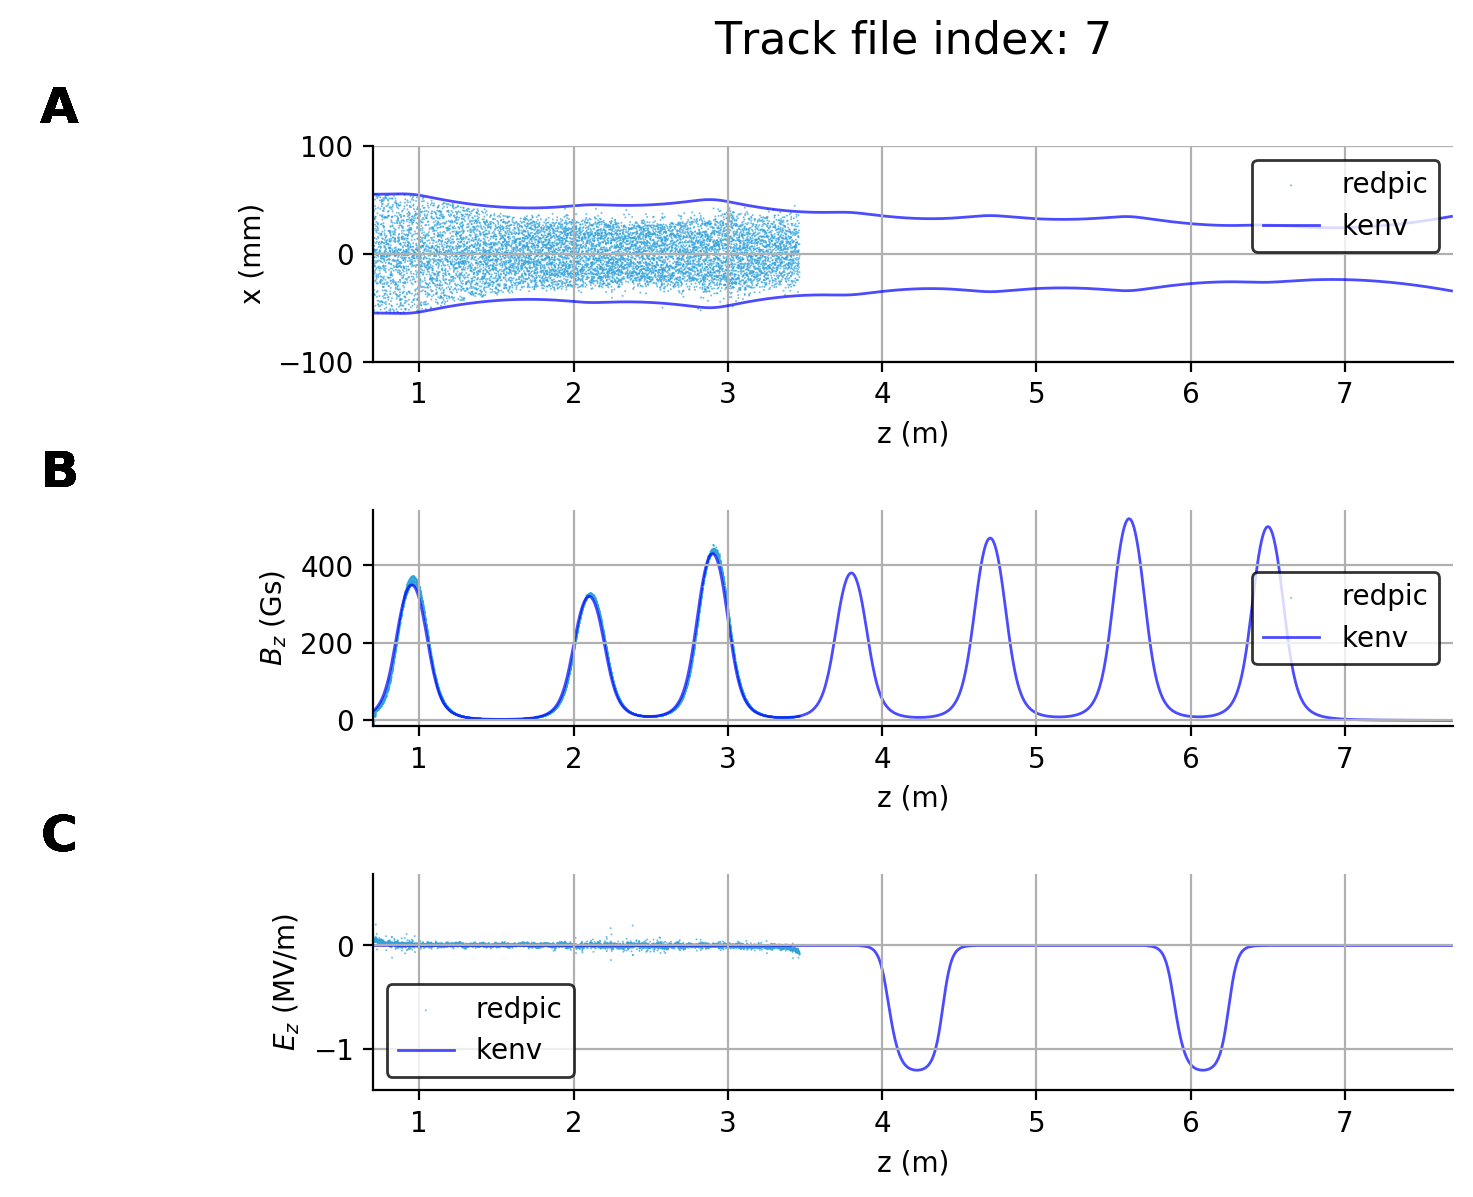
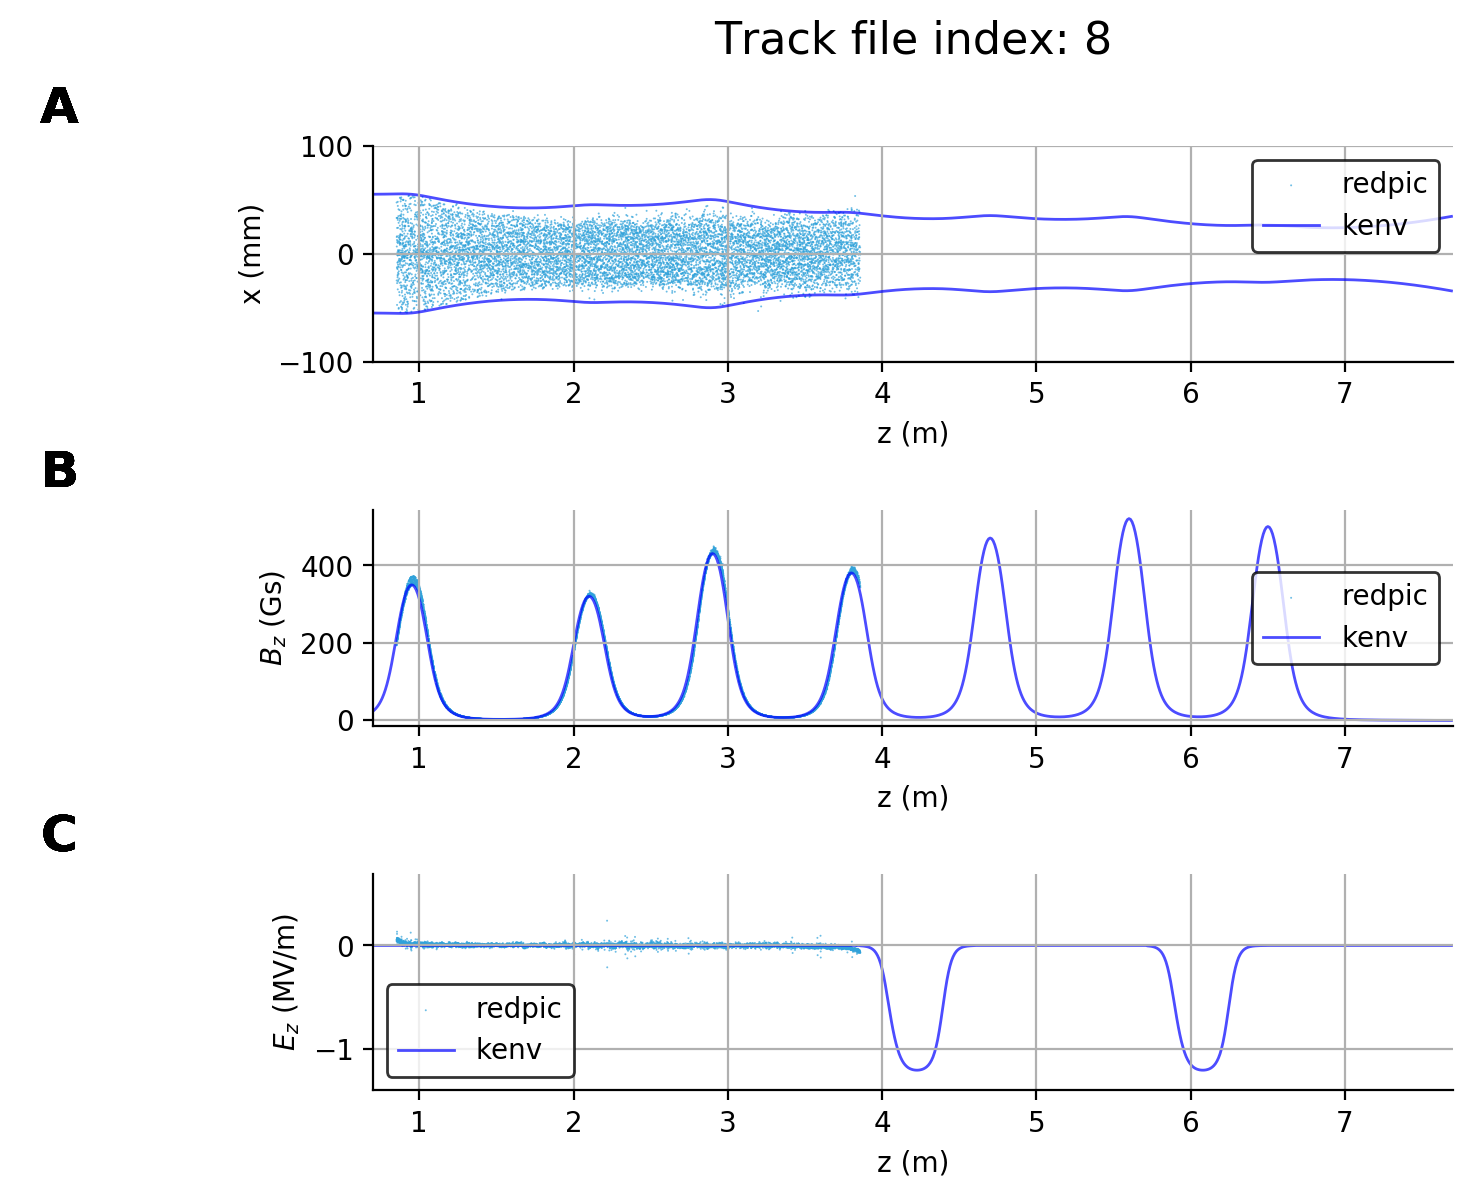
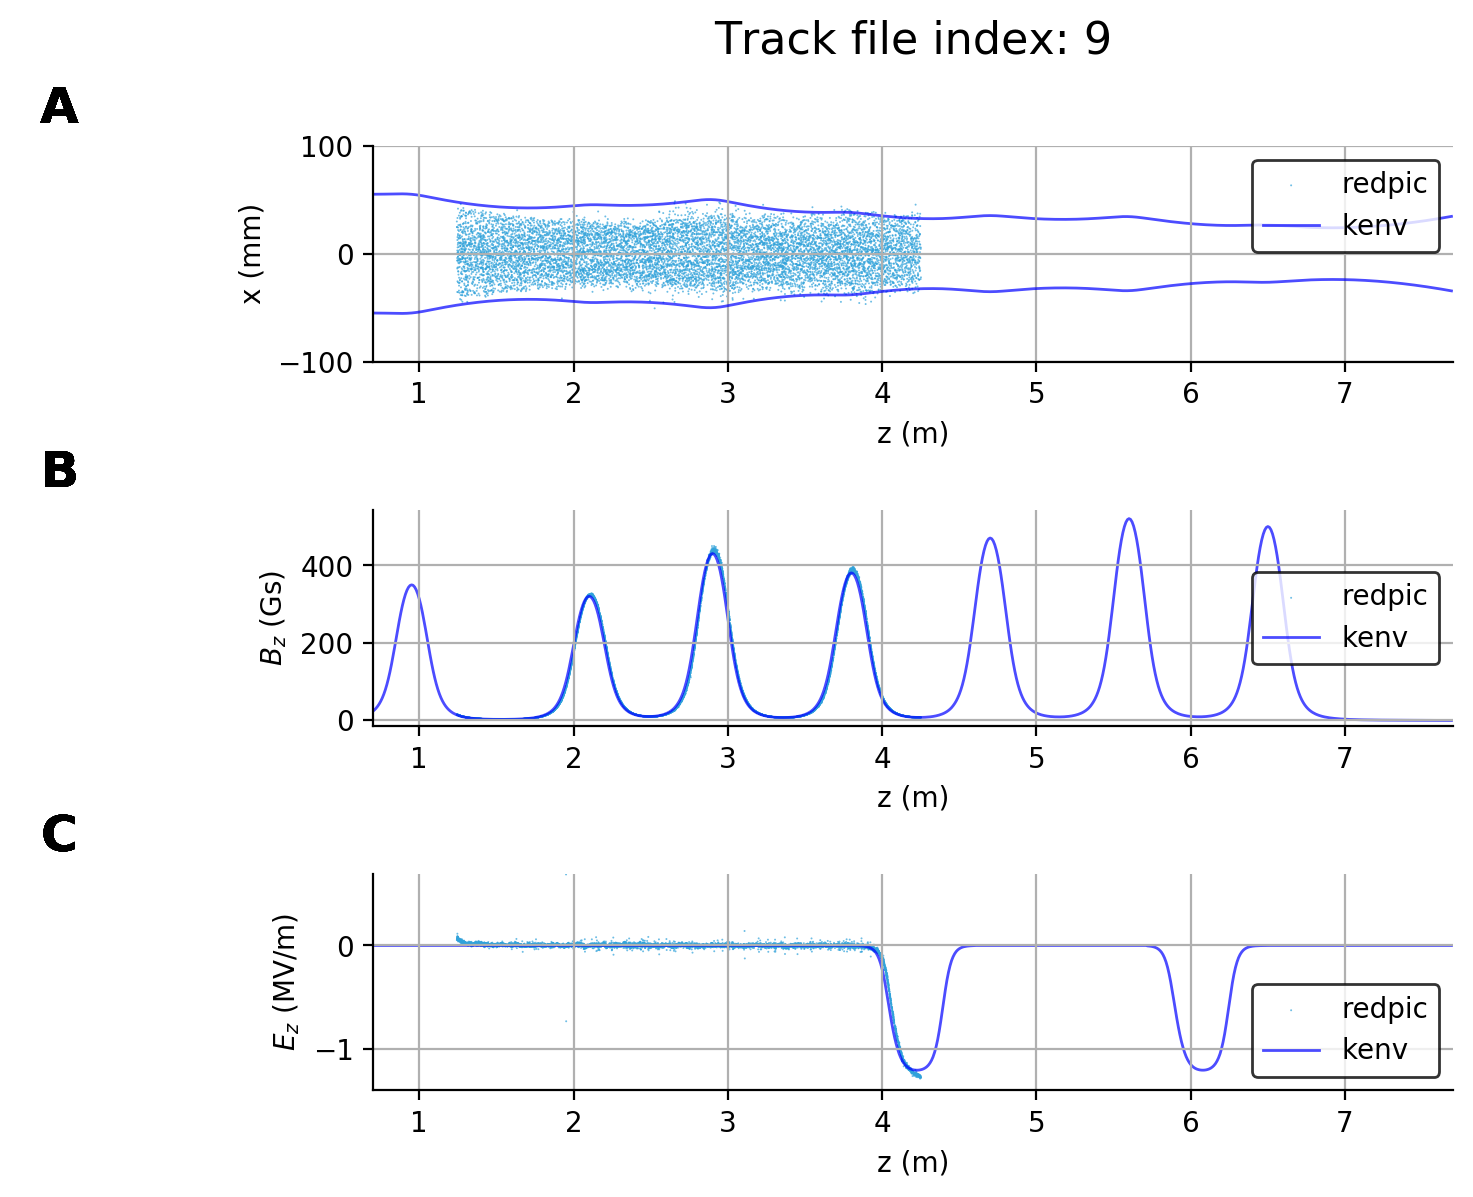
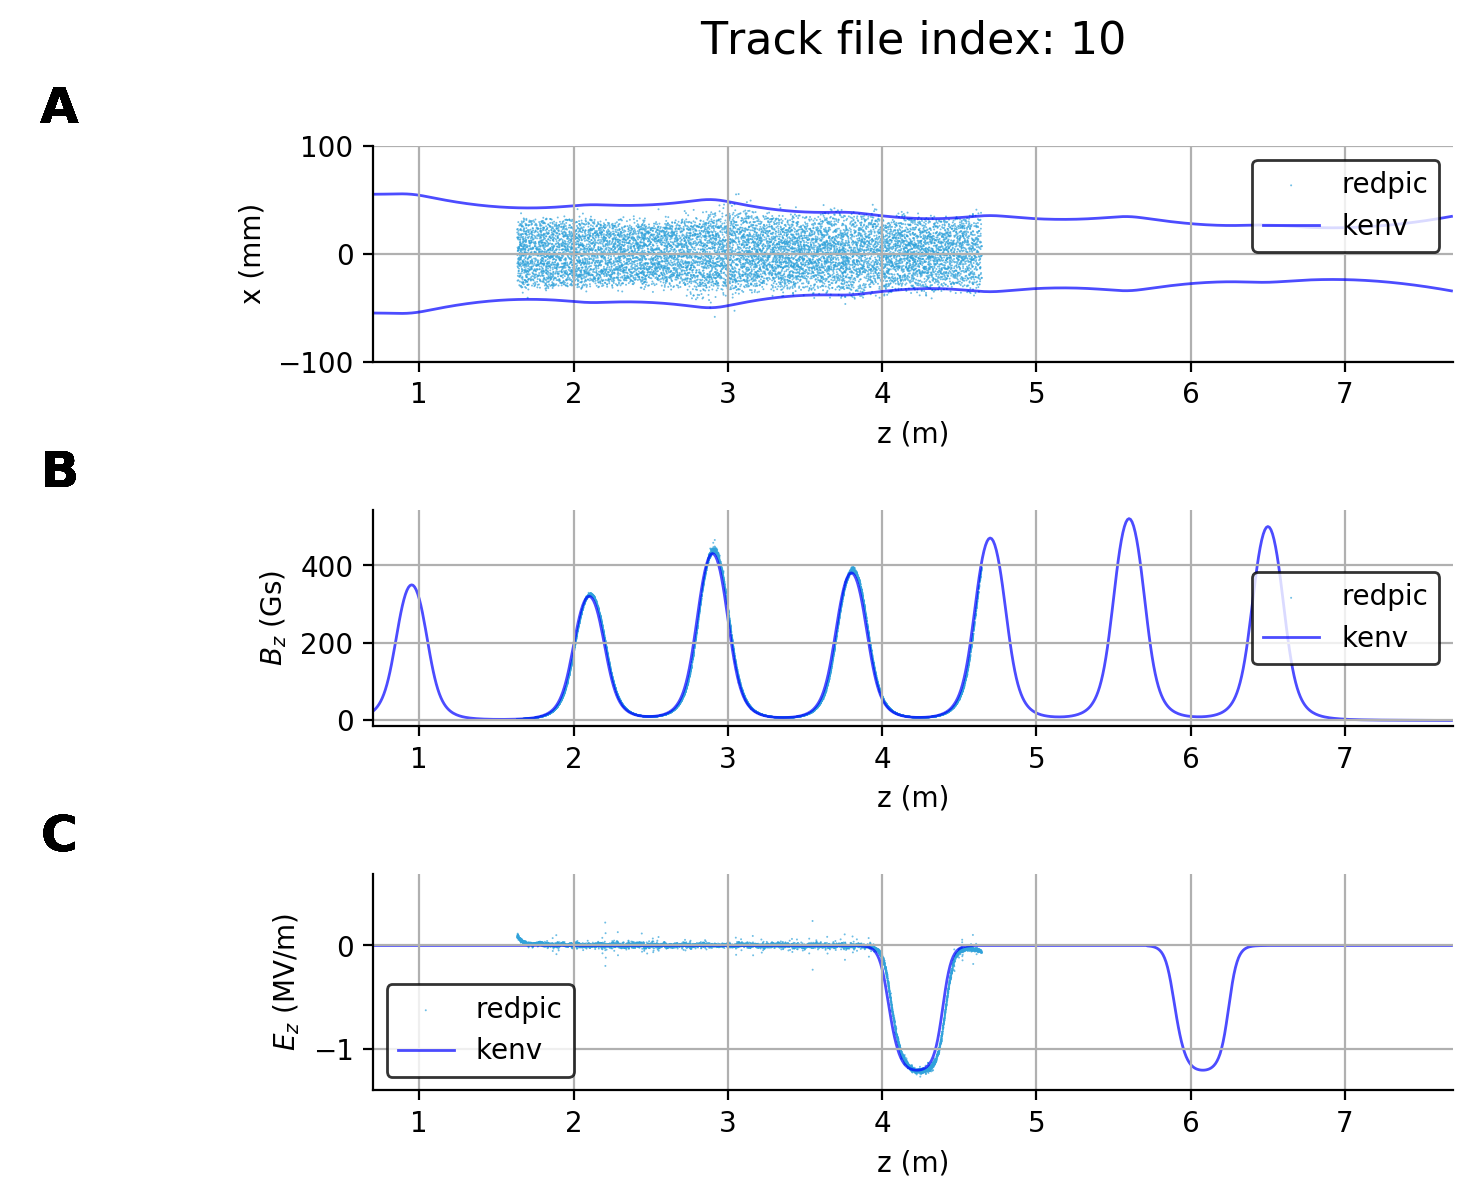
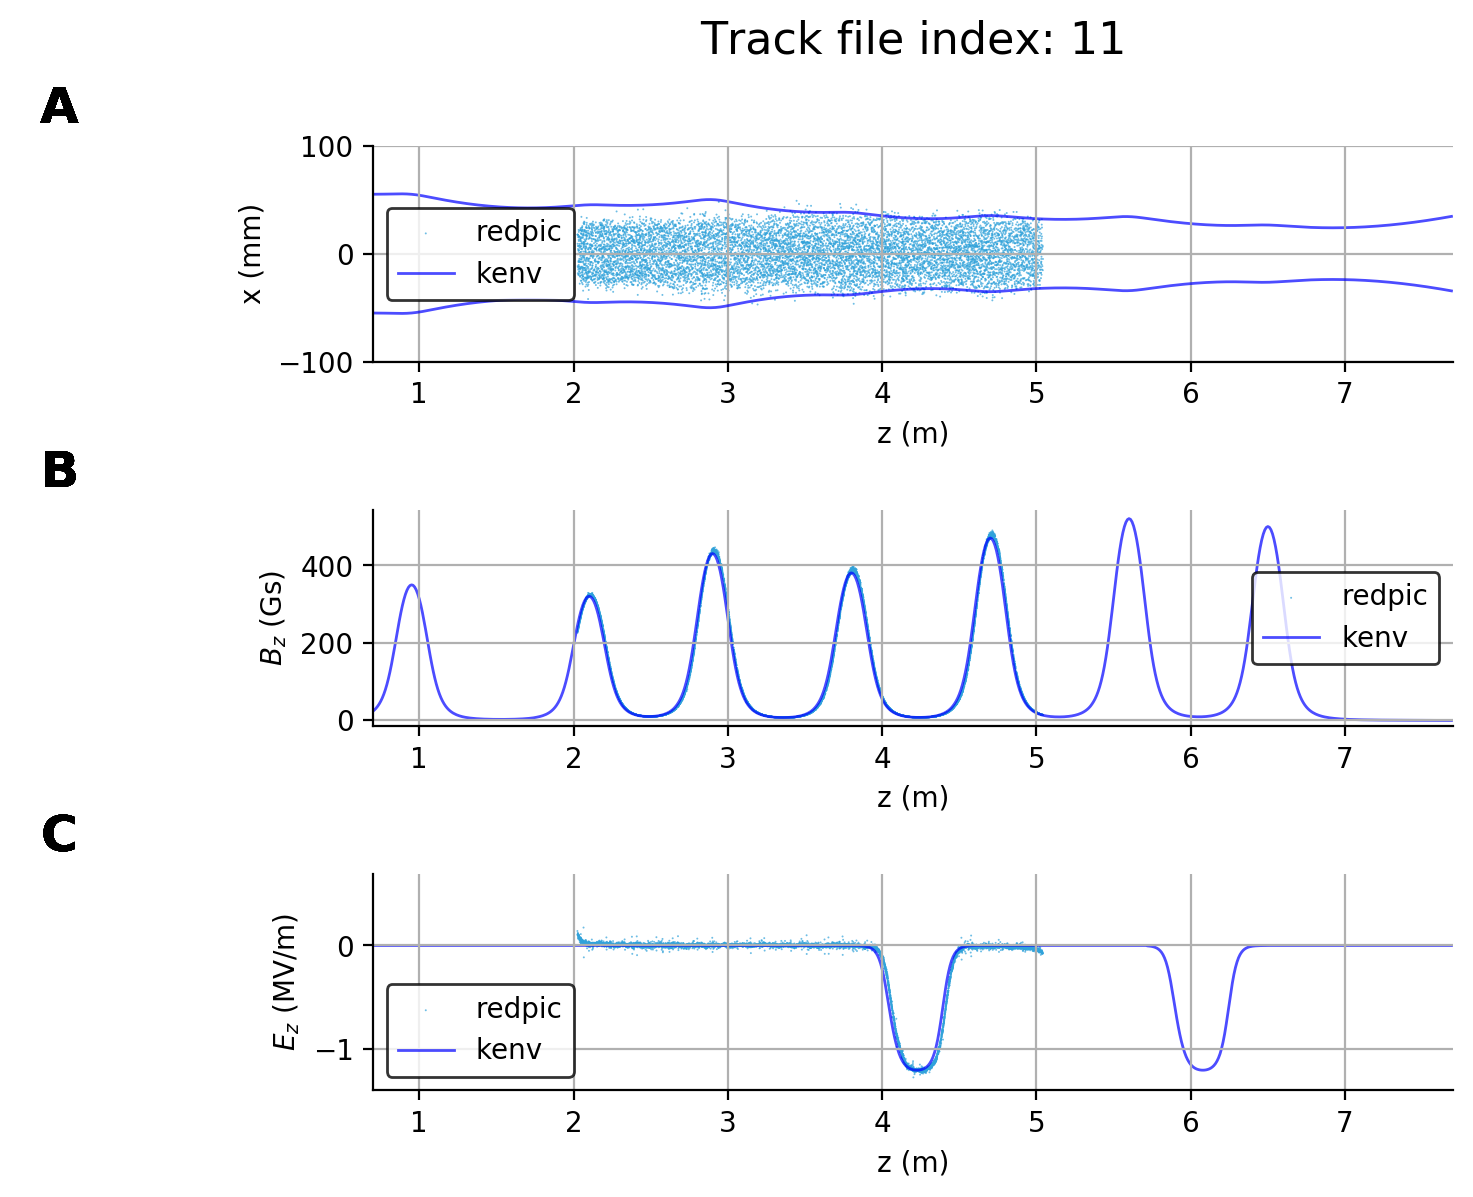
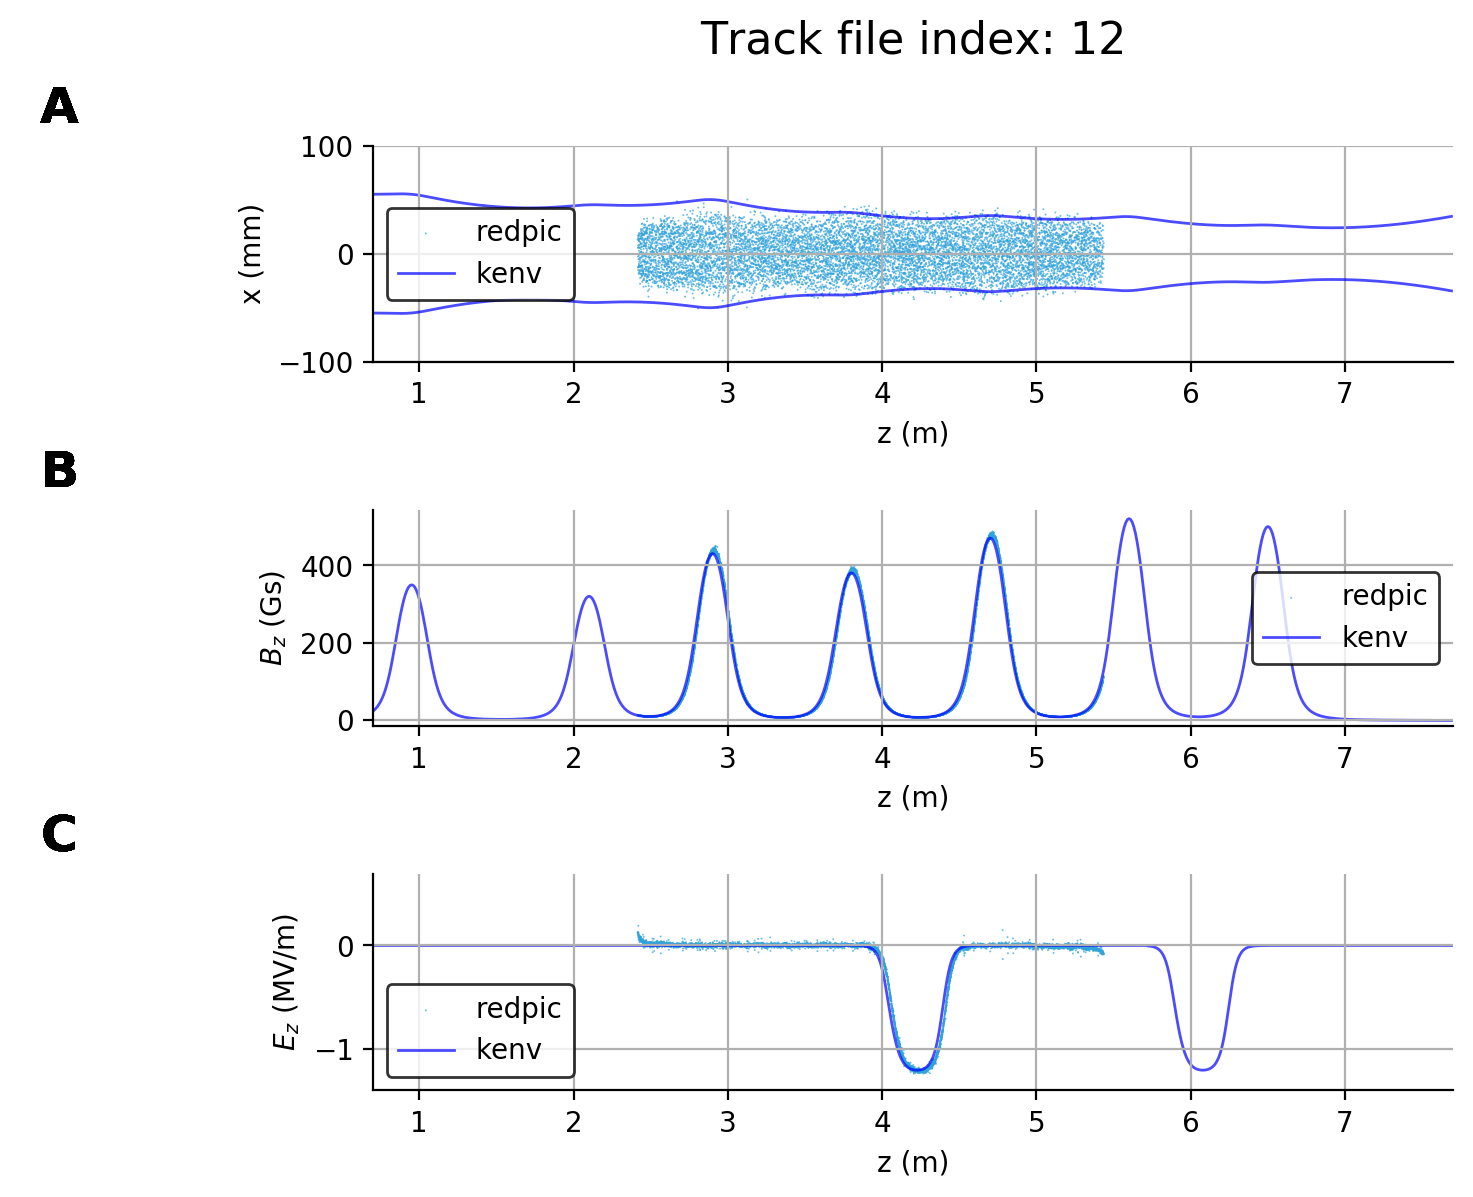
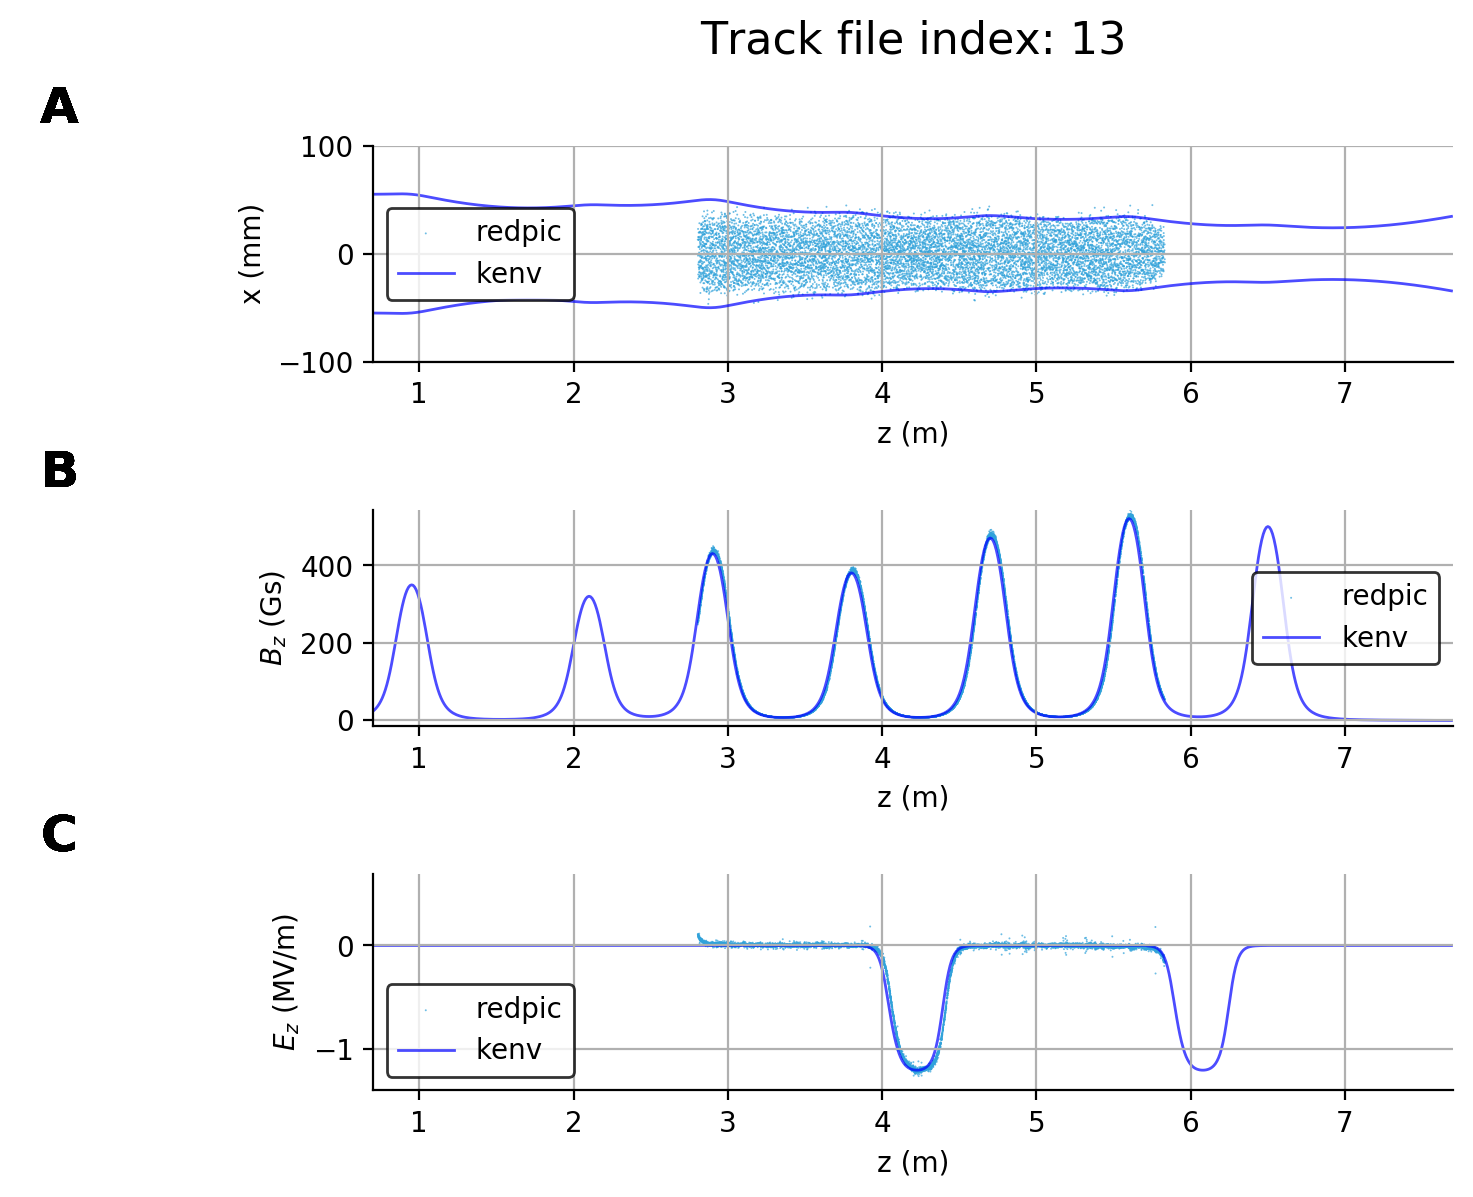
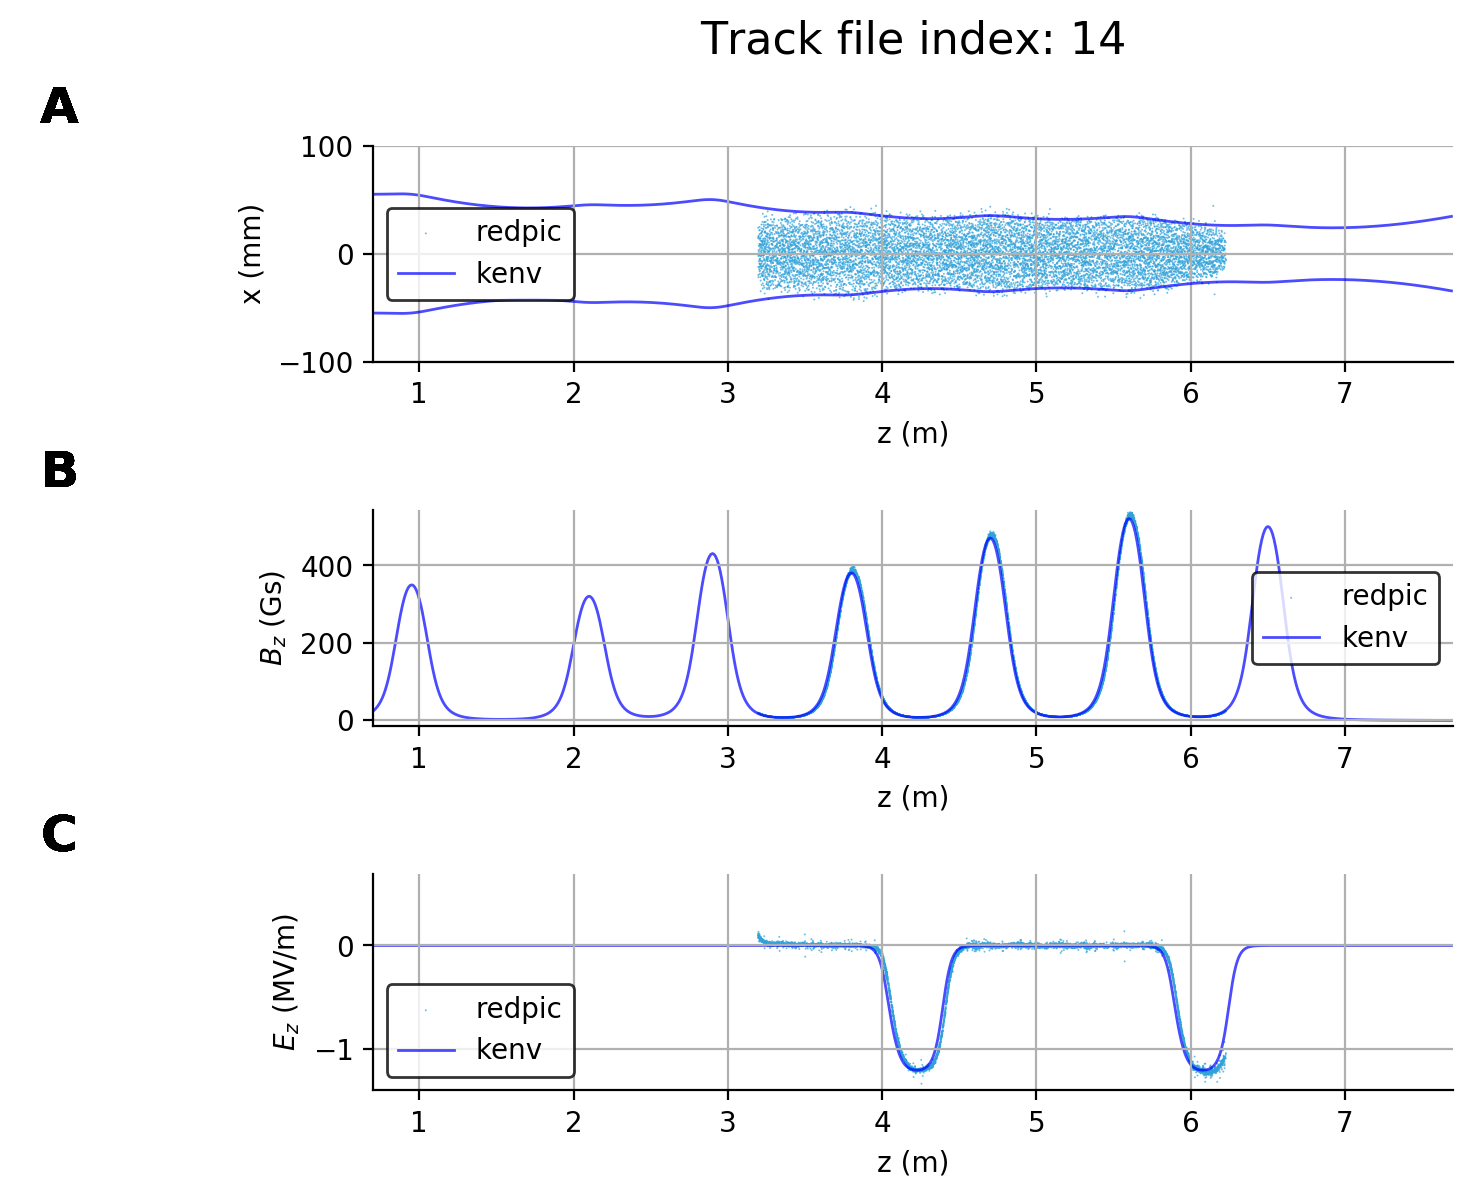
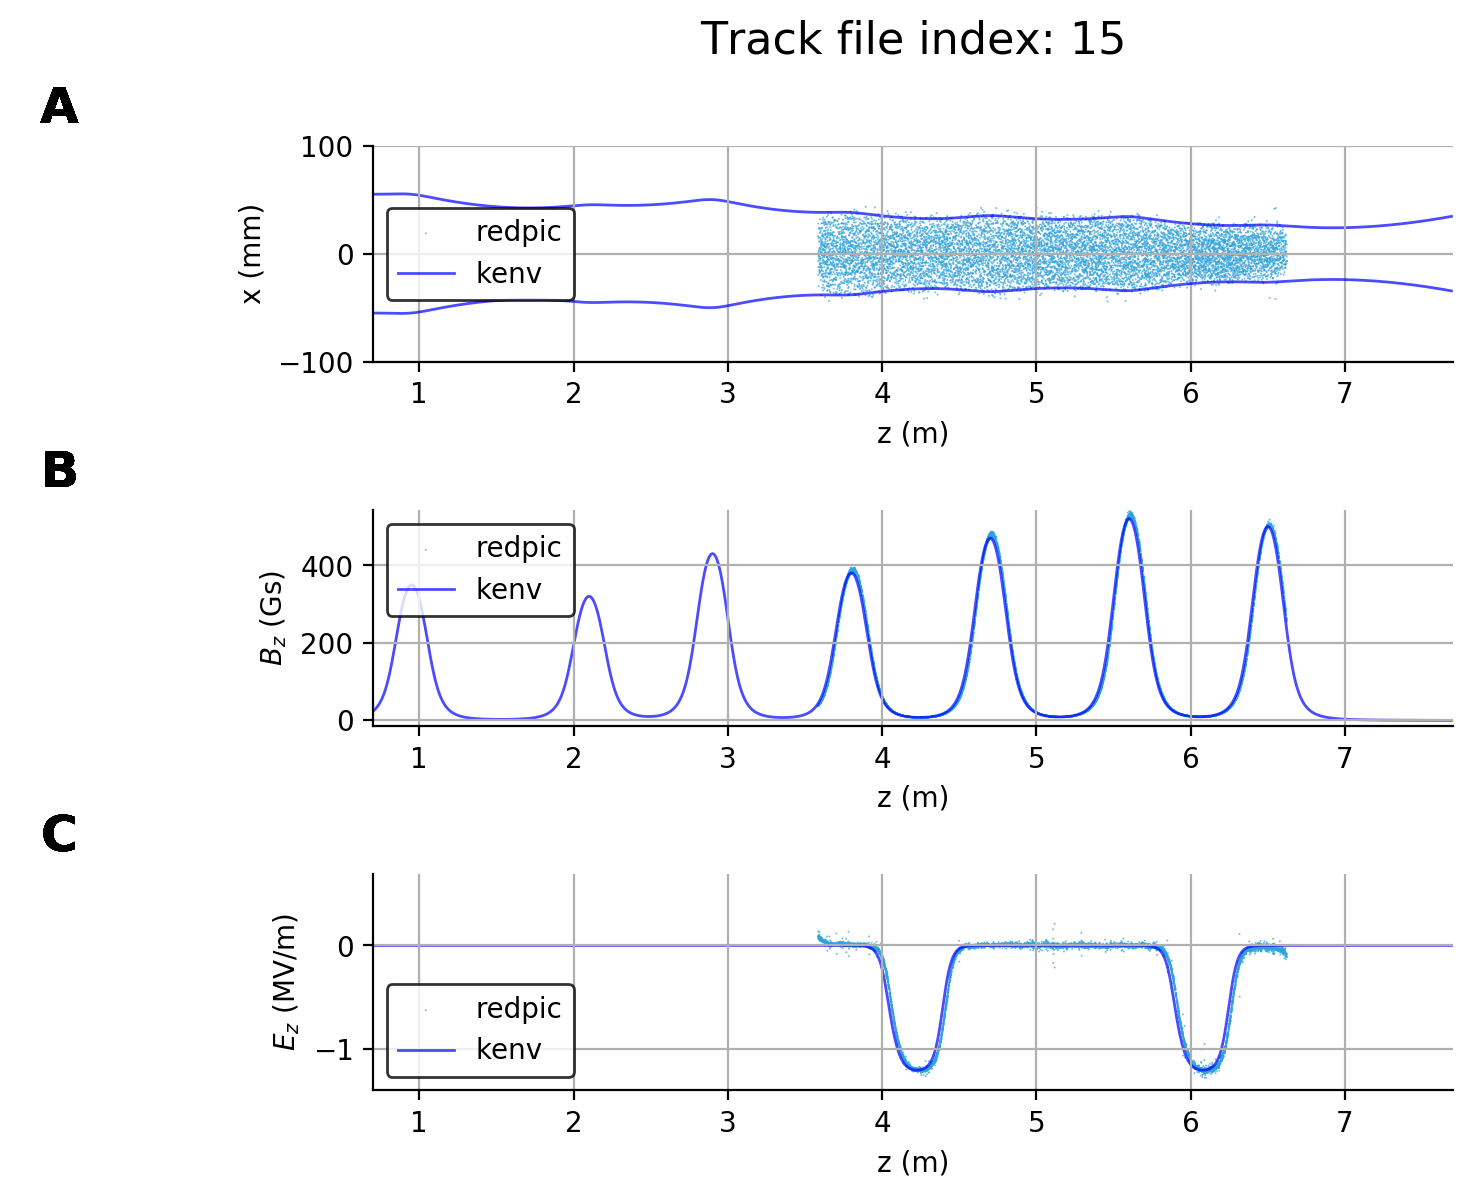
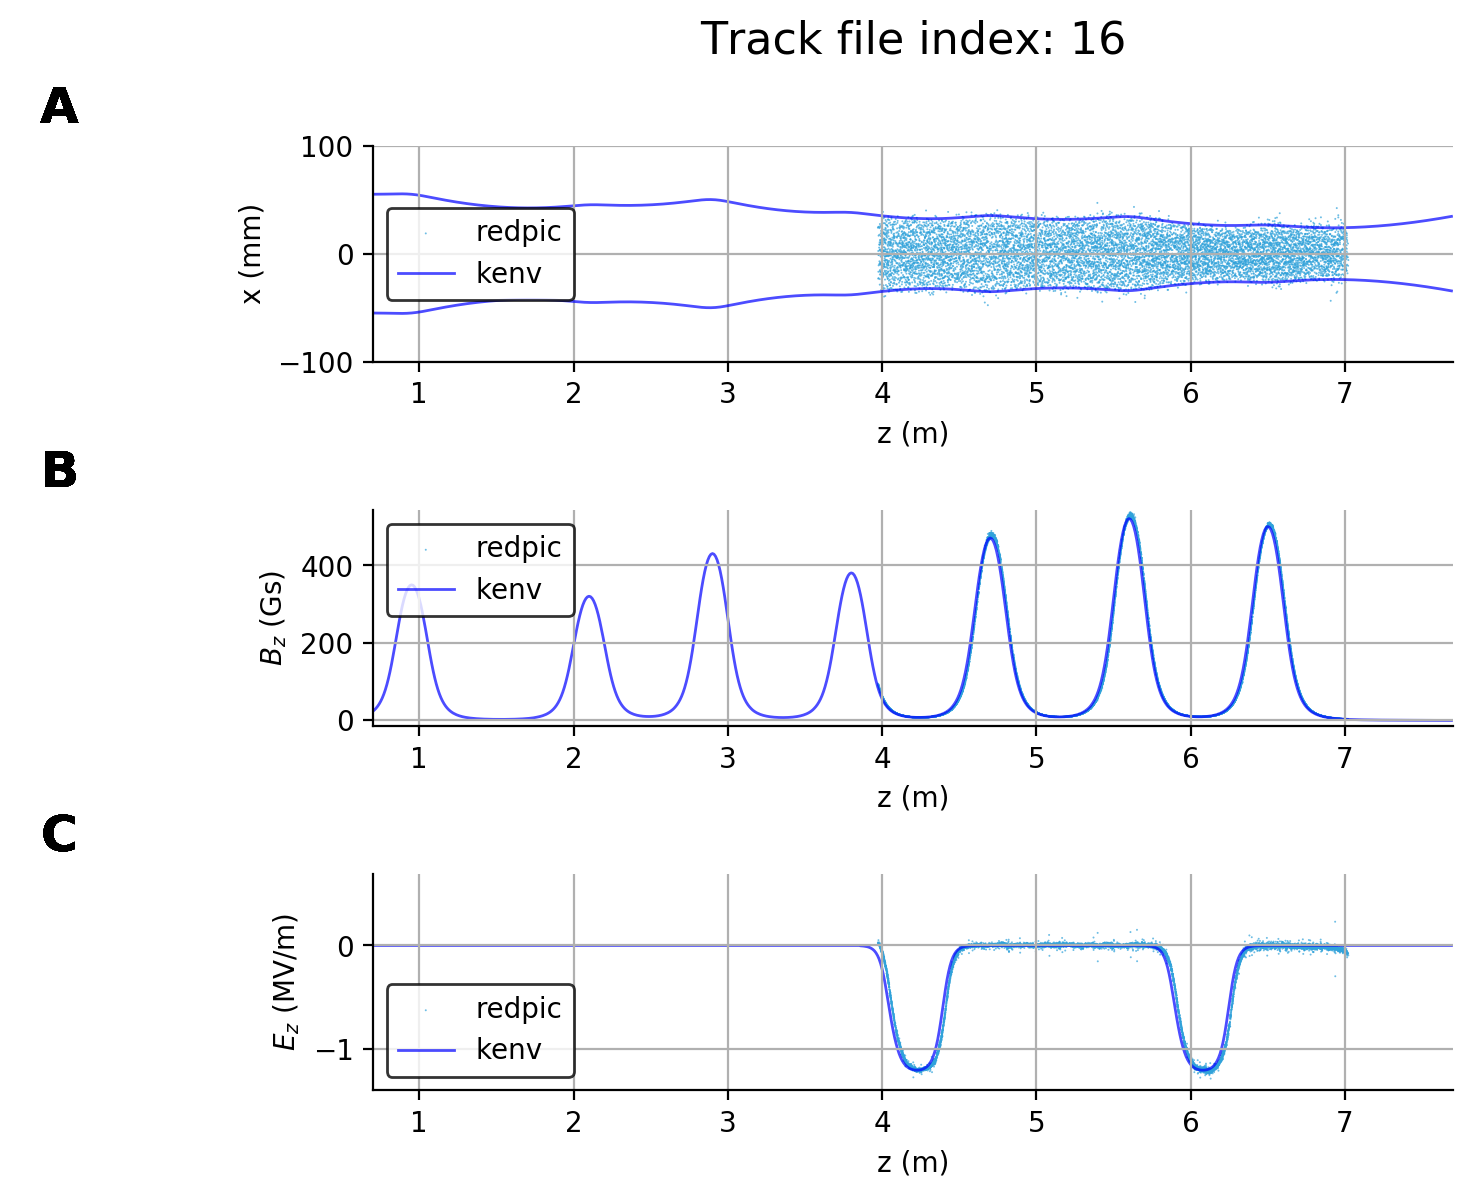
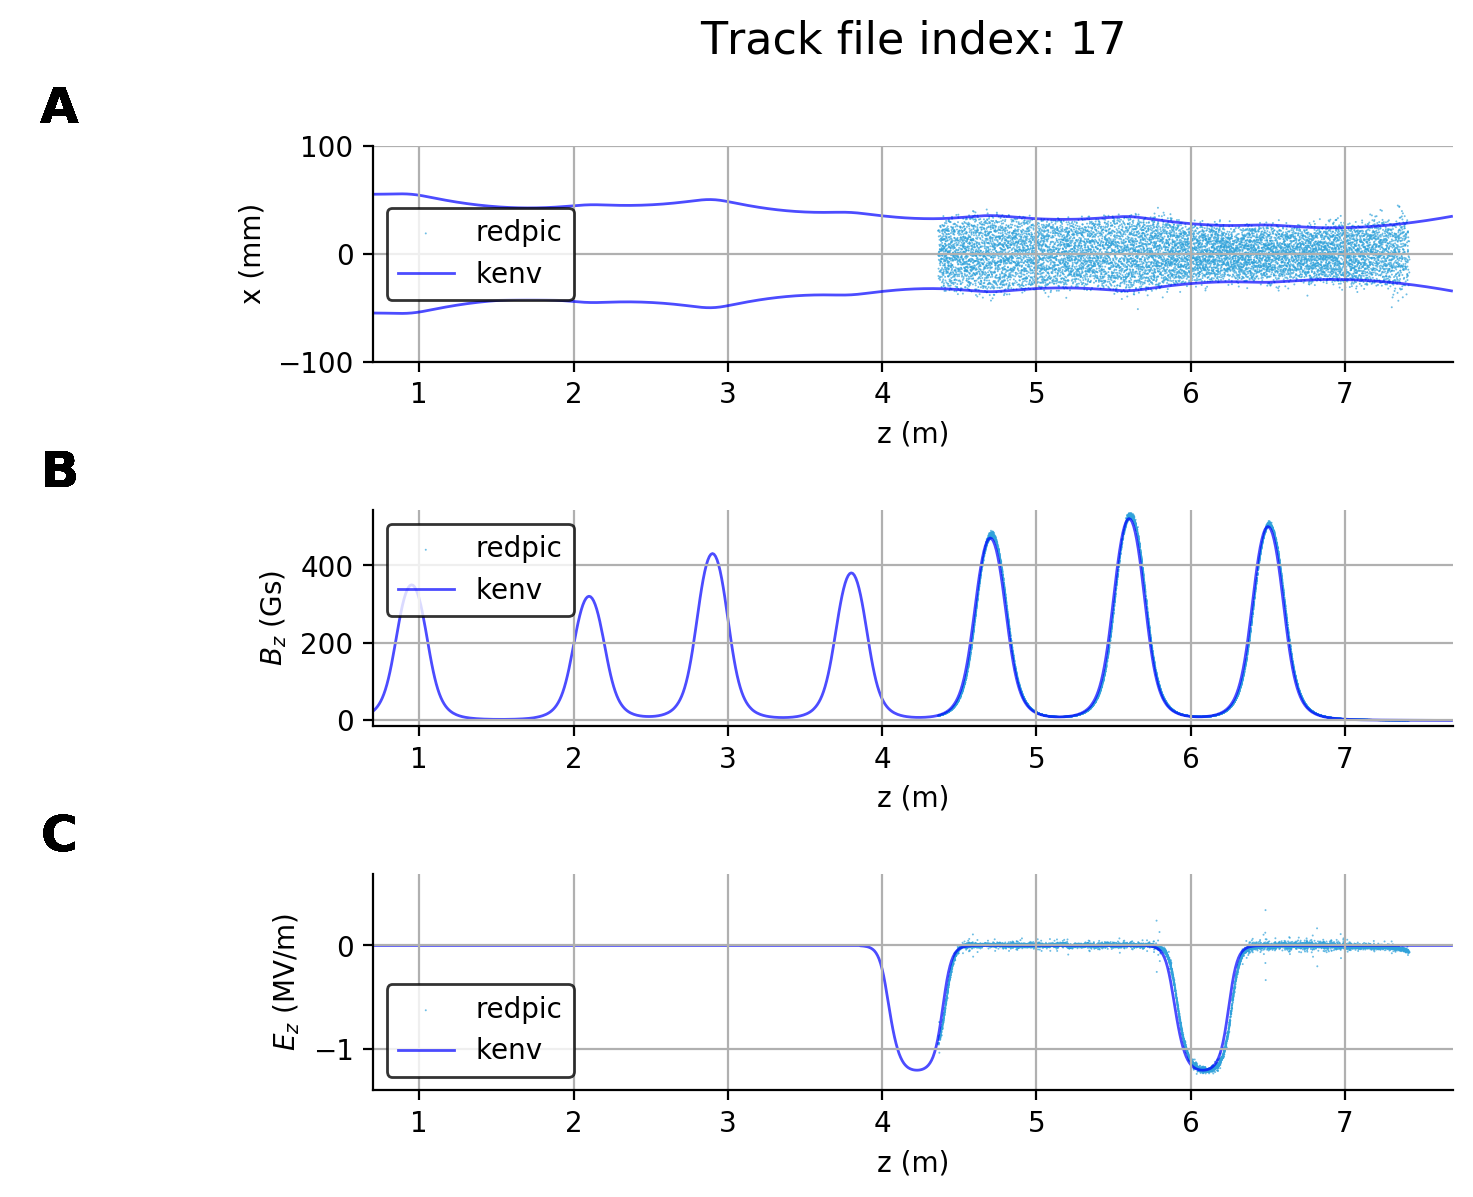
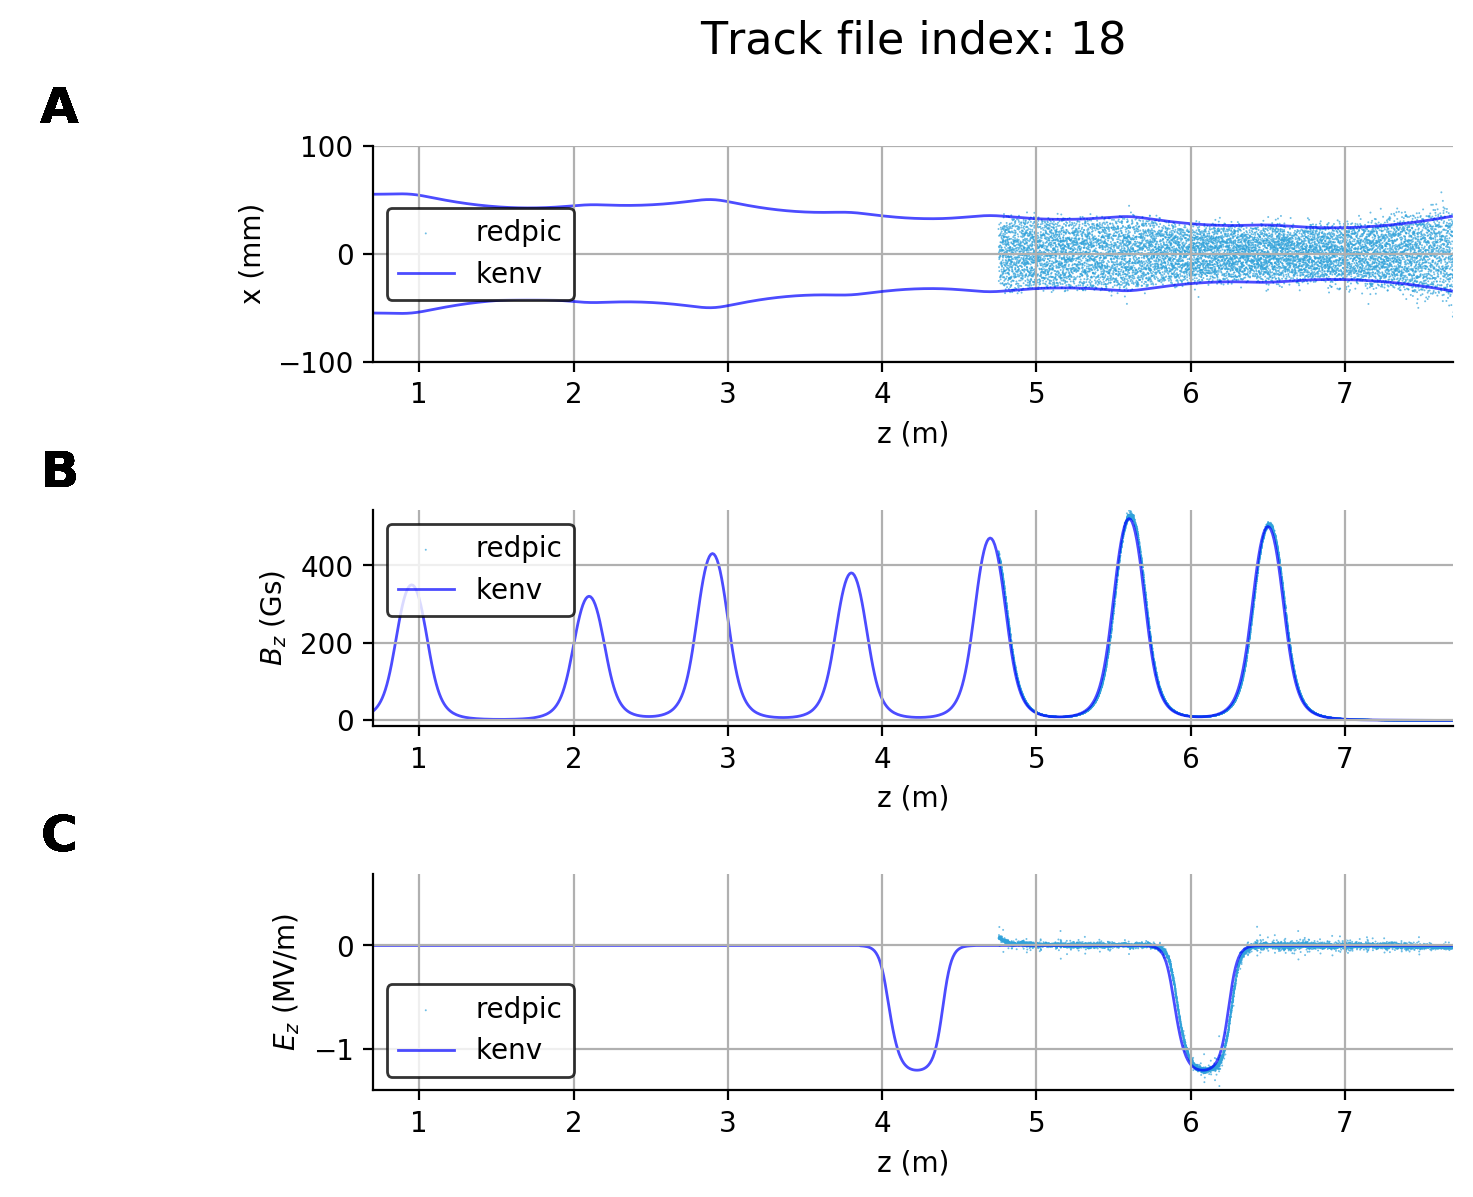
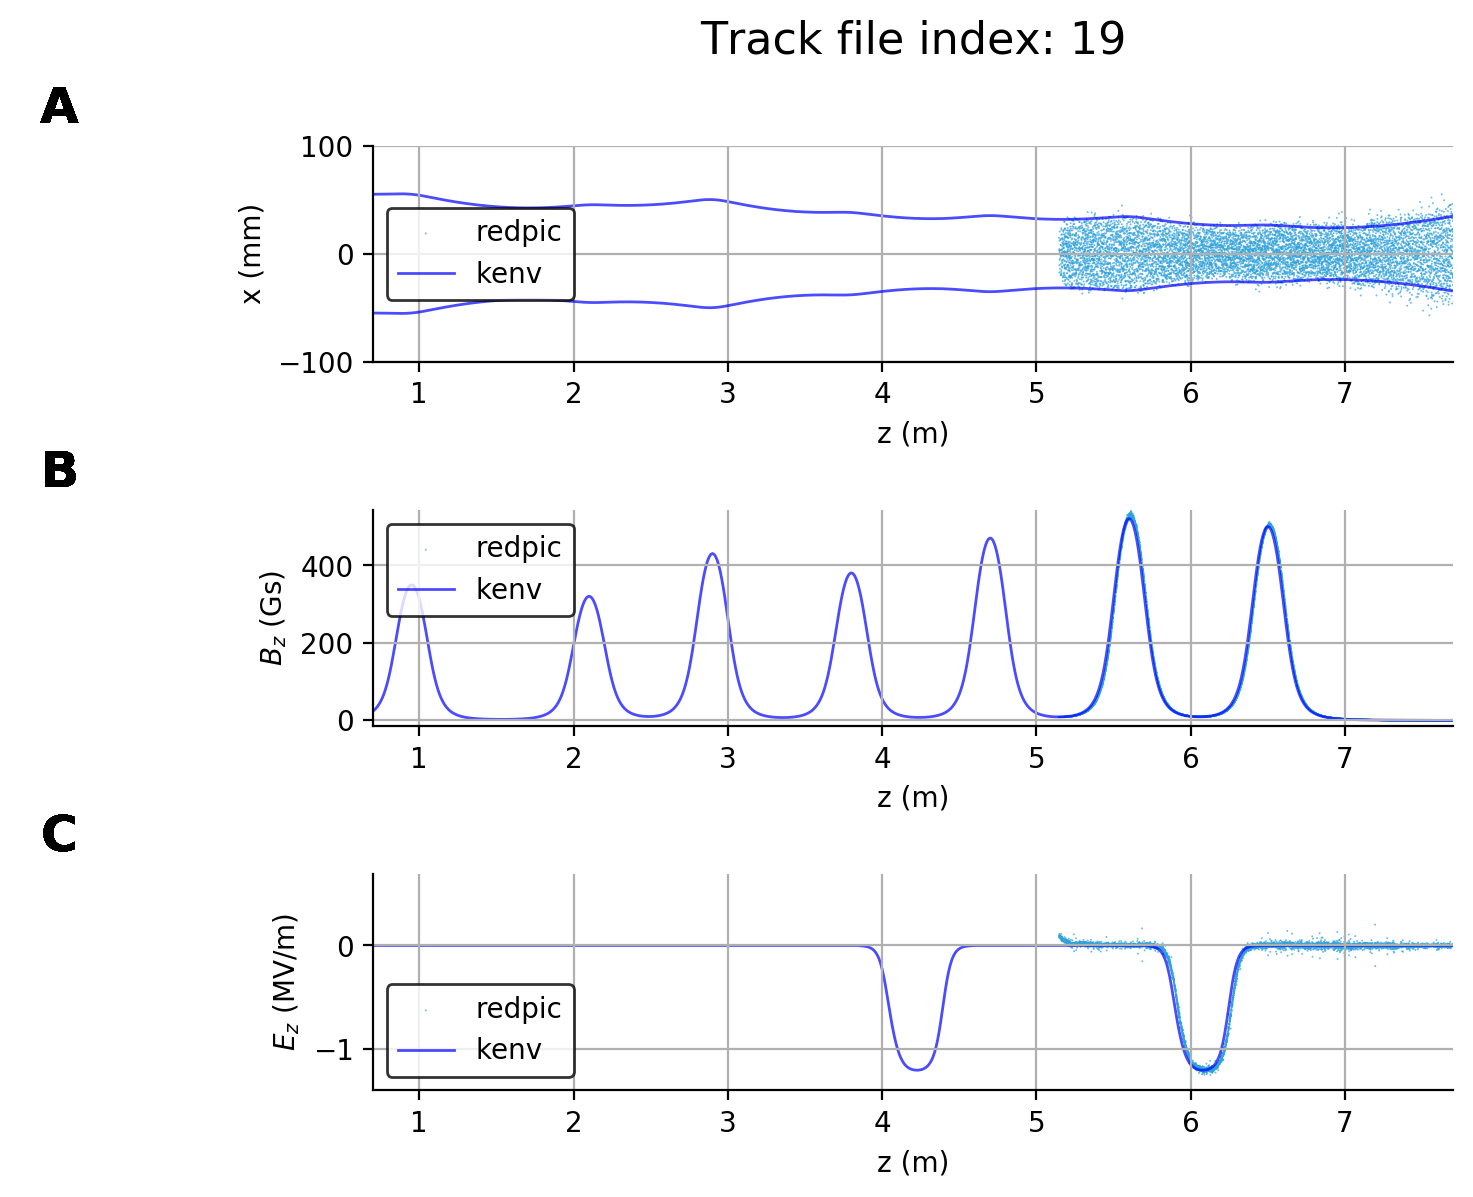
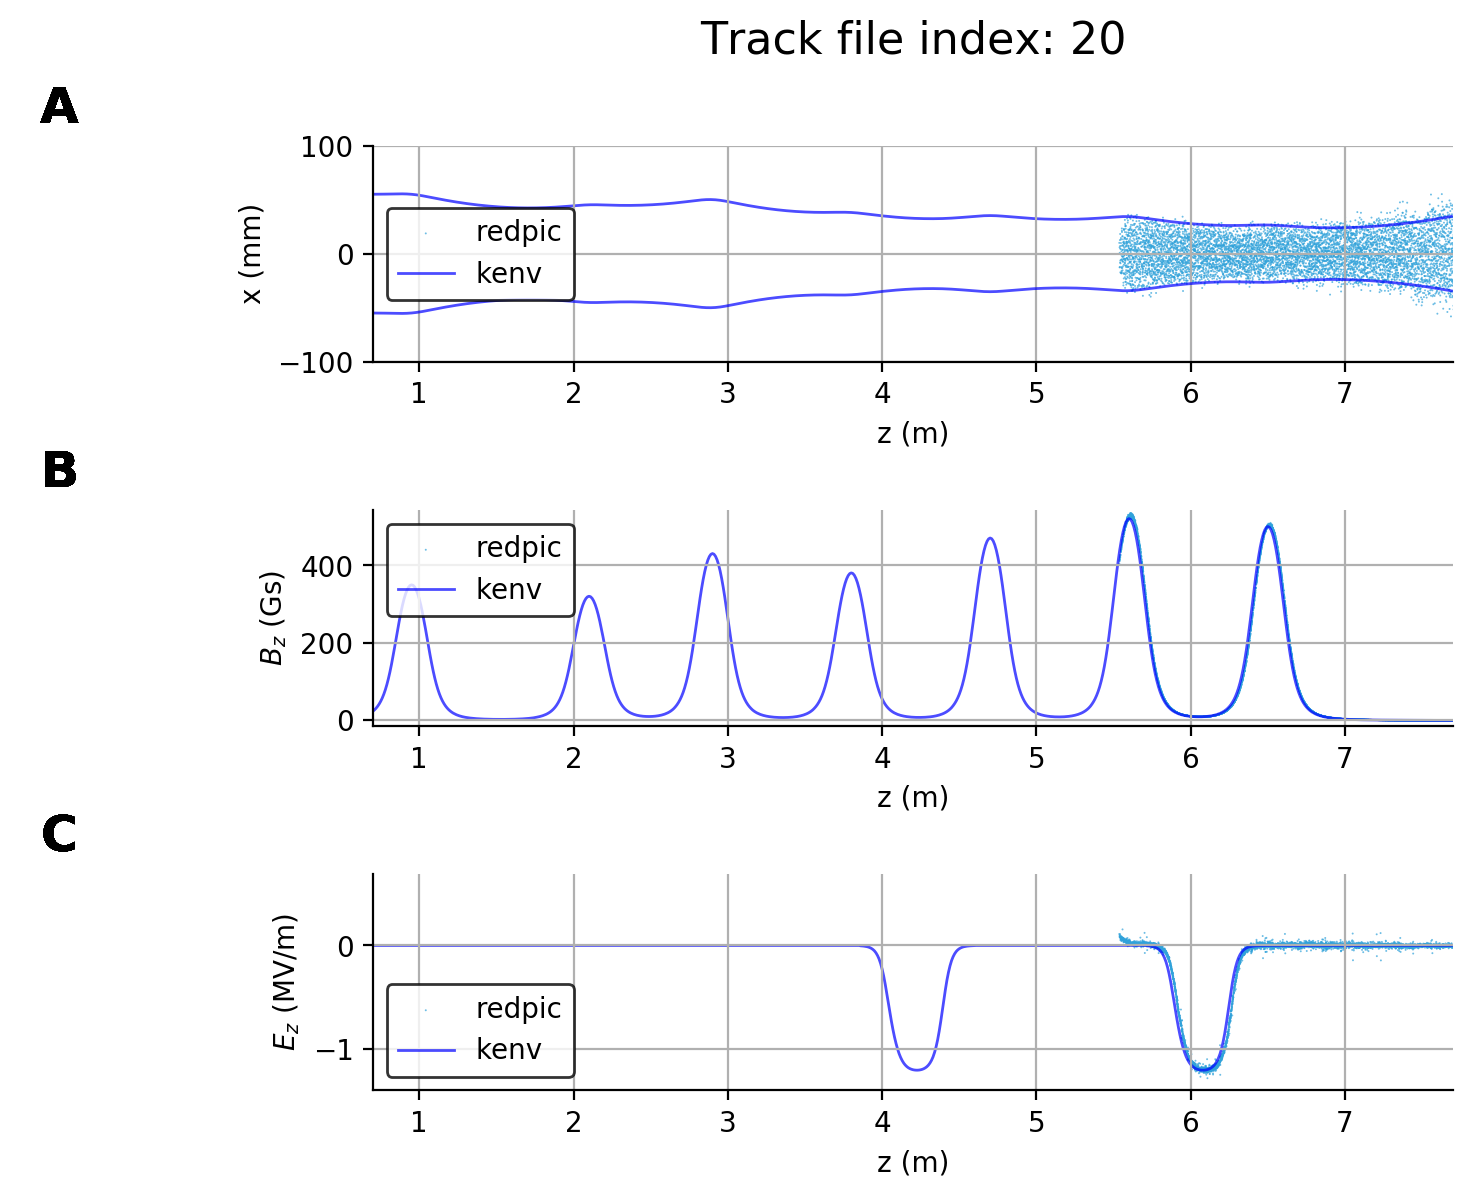
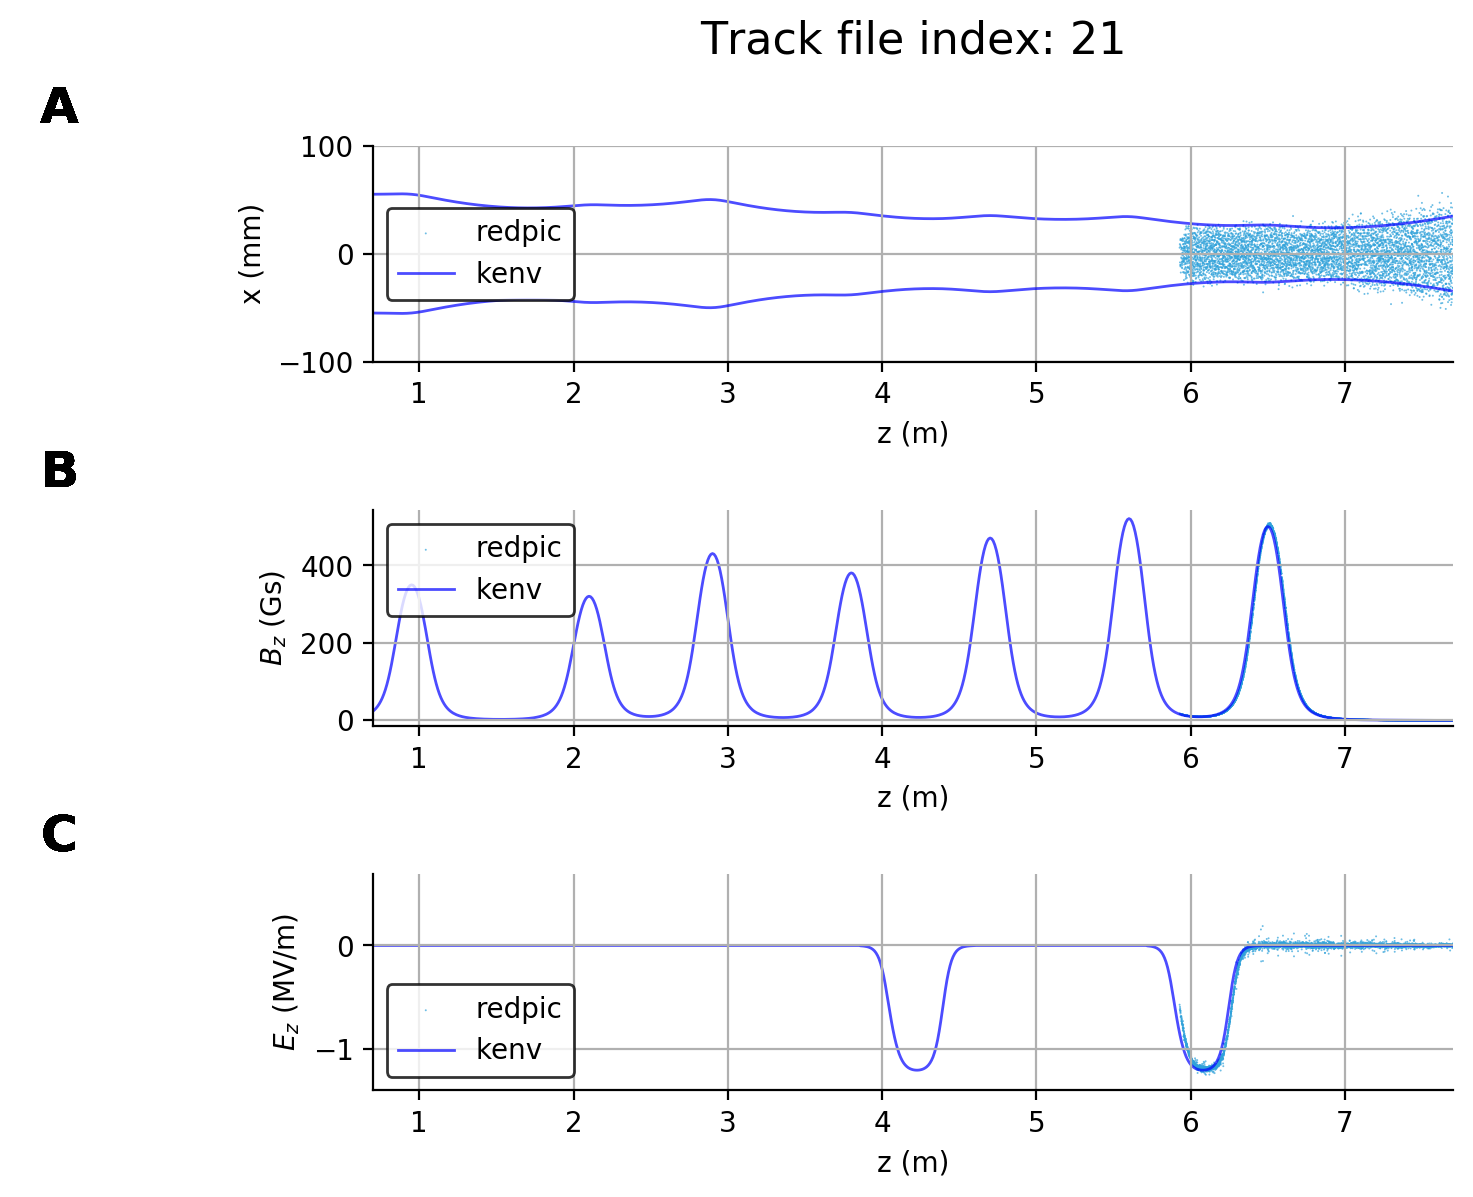
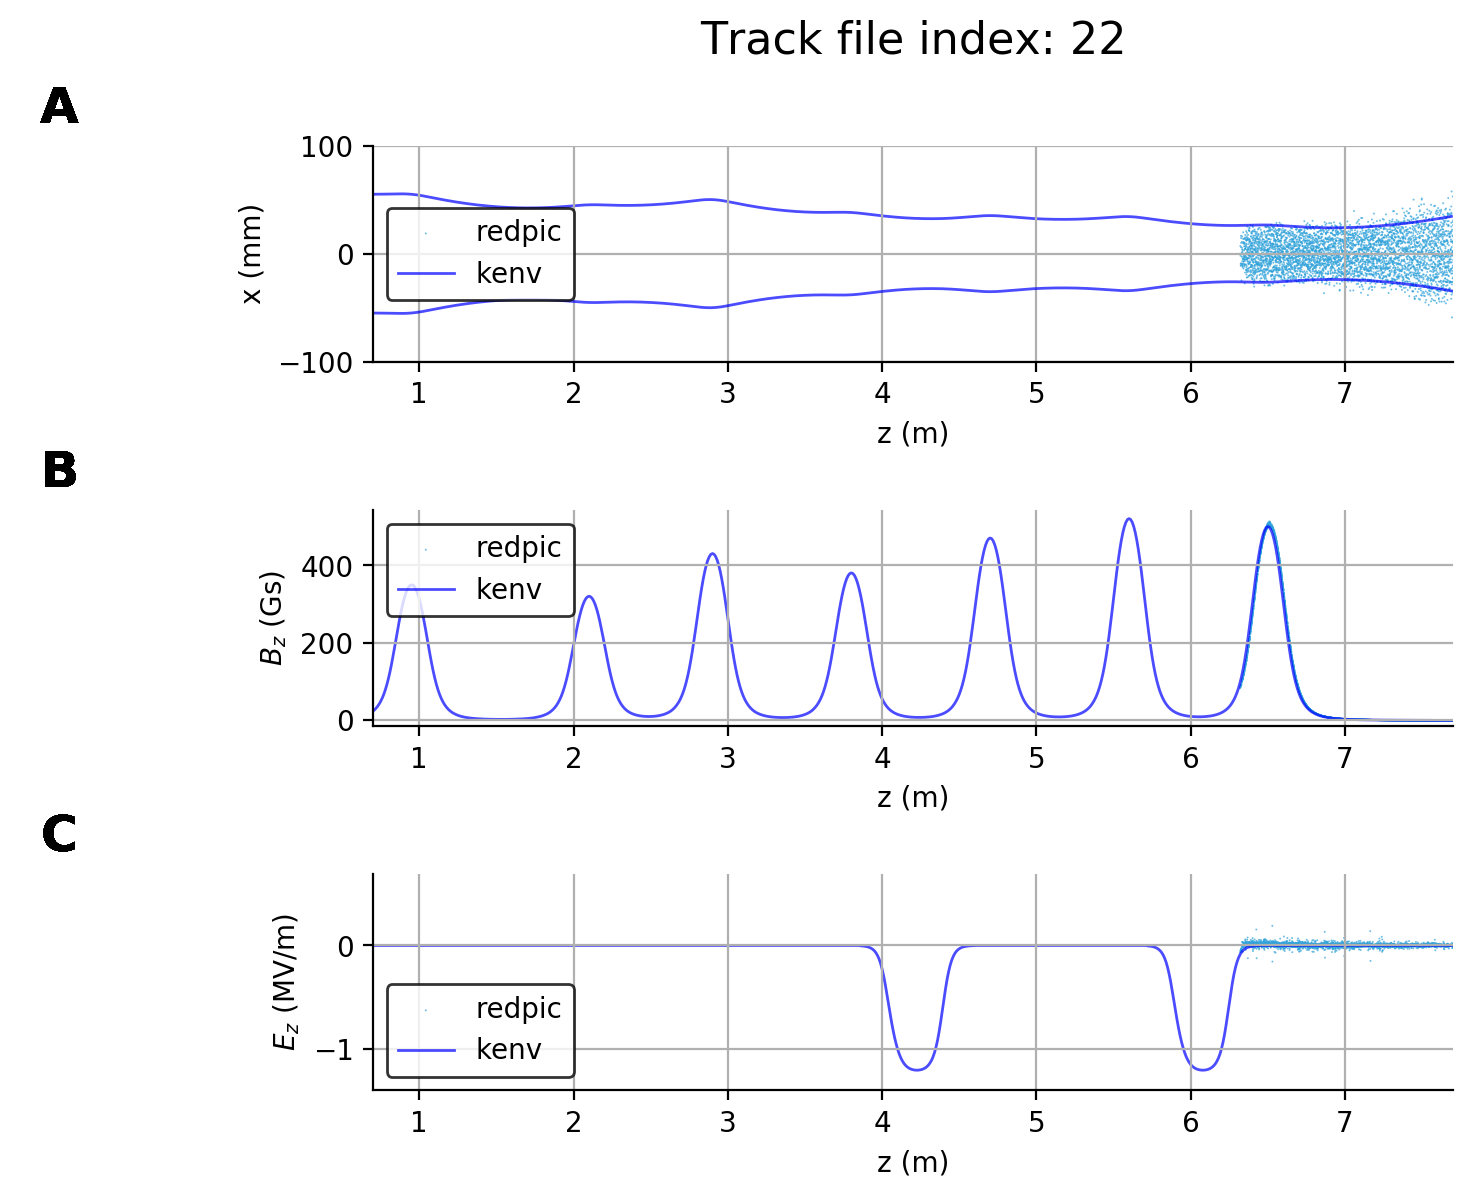
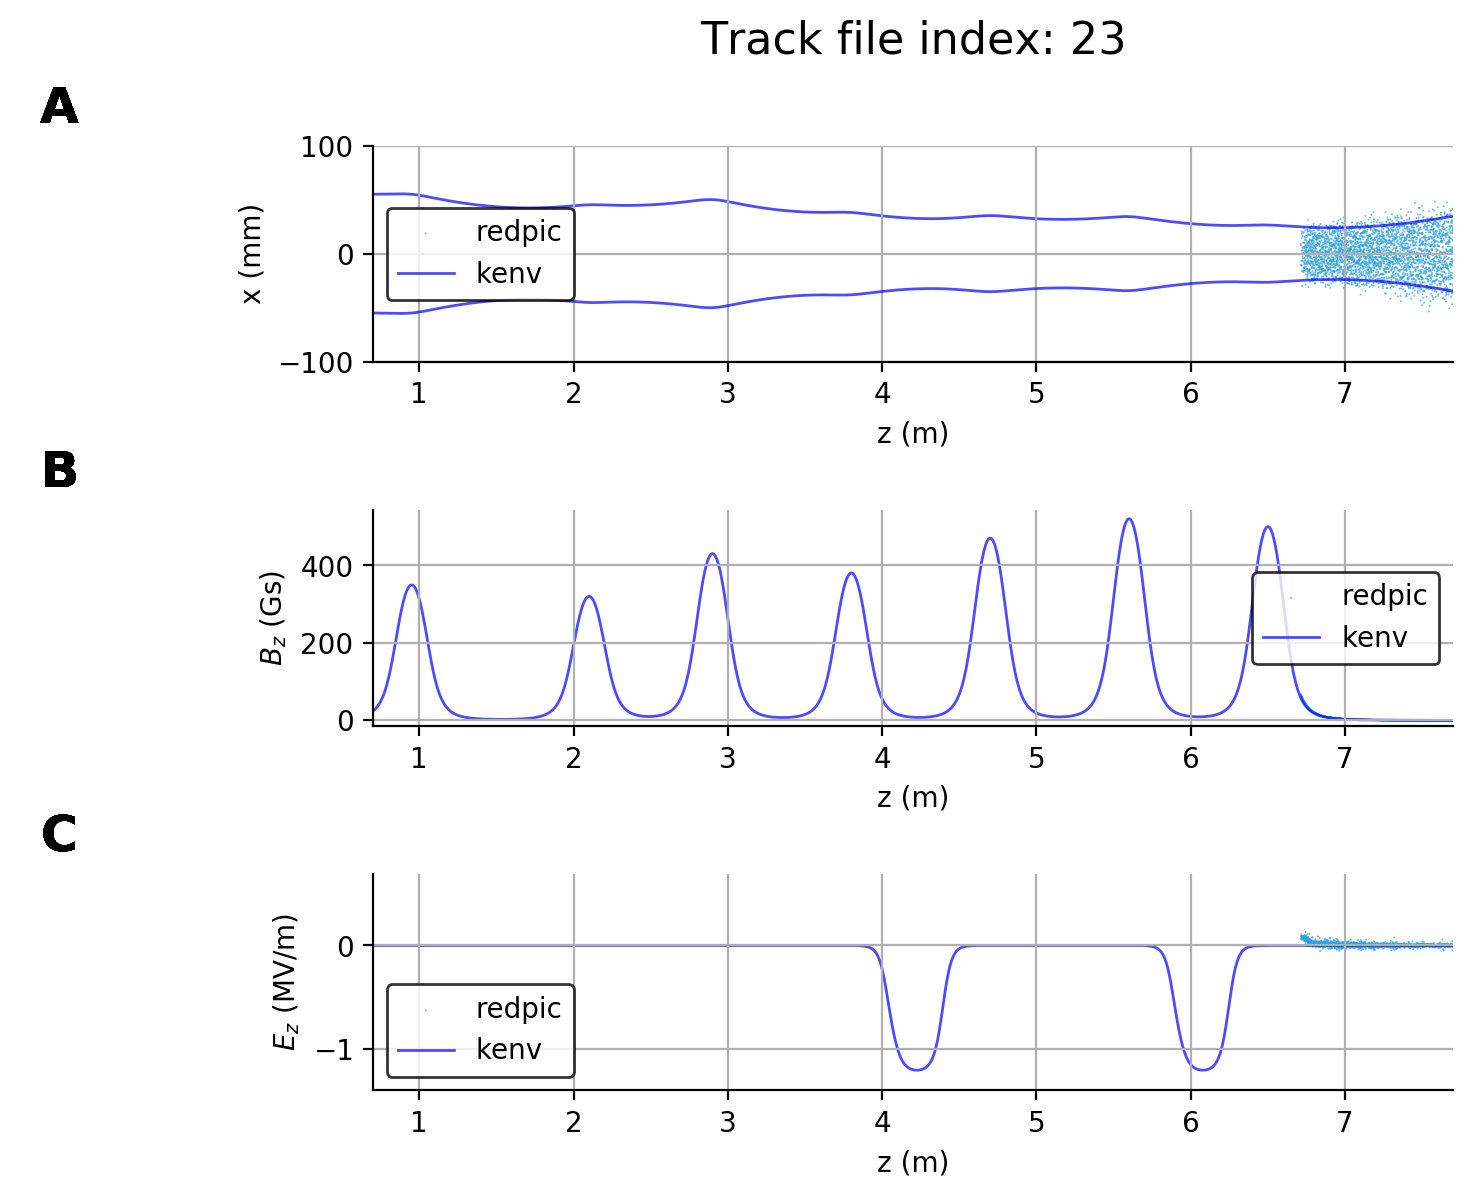
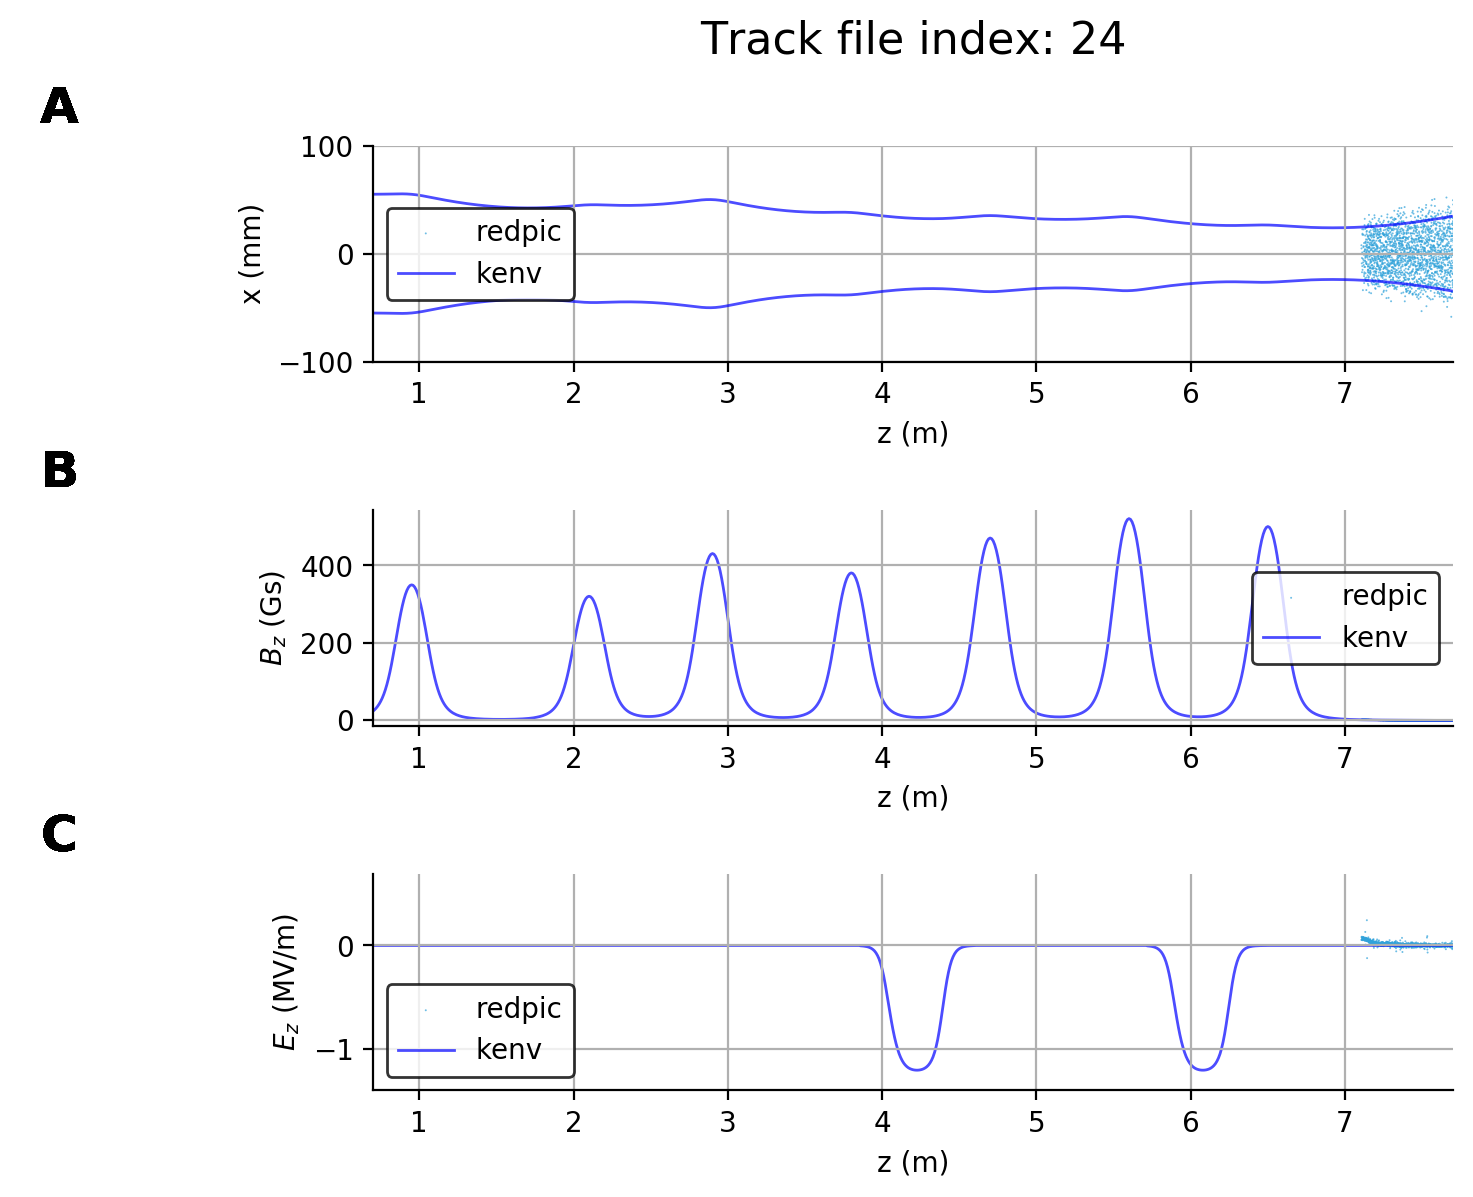

In [19]:
items = [(i, plot(i)) for i in i_to_plot]

hv.HoloMap(items, kdims = ['Track file index']).collate()